In [116]:
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
from matplotlib import pyplot
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score,auc
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
import random
from sklearn.model_selection import StratifiedKFold
from statistics import mean
import matplotlib.pyplot as plt

The above libraries have been used for this assignment.

### Solution to 1(a) as below:

Downloading the dataset:

In [61]:
wdbc=pd.read_csv('/Users/sharadsharma/Downloads/Homework6Data/wdbc.csv',names=
['IDNumber',
 'Diagnosis',
 'mean_radius',
 'mean_texture',
 'mean_perimeter',
 'mean_area',
 'mean_smoothness',
 'mean_compactness',
 'mean_concavity',
 'mean_concave_points',
 'mean_symmetry',
 'mean_fractal_dimension',
 'standard_error_radius',
 'standard_error_texture',
 'standard_error_perimeter',
 'standard_error_area',
 'standard_error_smoothness',
 'standard_error_compactness',
 'standard_error_concavity',
 'standard_error_concave_points',
 'standard_error_symmetry',
 'standard_error_fractal_dimension',
 'worst_radius',
 'worst_texture',
 'worst_perimeter',
 'worst_area',
 'worst_smoothness',
 'worst_compactness',
 'worst_concavity',
 'worst_concave_points',
 'worst_symmetry',
'worst_fractal_dimension'])

In [62]:
wdbc.shape

(569, 32)

In [63]:
wdbc.head(5)

,IDNumber,Diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In the below steps, we make sure that we use the first 20% of the positive and negative classes in the
file as the test set and the rest as the training set.

In [64]:
wdbc_B=wdbc[wdbc['Diagnosis']=='B']
wdbc_M=wdbc[wdbc['Diagnosis']=='M']
wdbc_B20=wdbc_B.head(math.ceil(len(wdbc_B)*(20/100)))
wdbc_M20=wdbc_M.head(math.ceil(len(wdbc_M)*(20/100)))
wdbc_test=pd.concat([wdbc_B20,wdbc_M20],ignore_index=True)

In [65]:
wdbc_test

,IDNumber,Diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,8510426,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
1,8510653,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
2,8510824,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
3,854941,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
4,85713702,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,855625,M,19.070,24.81,128.30,1104.0,0.09081,0.21900,0.21070,0.099610,...,24.090,33.17,177.40,1651.0,0.12470,0.74440,0.72420,0.24930,0.4670,0.10380
111,856106,M,13.280,20.28,87.32,545.2,0.10410,0.14360,0.09847,0.061580,...,17.380,28.00,113.10,907.2,0.15300,0.37240,0.36640,0.14920,0.3739,0.10270
112,85638502,M,13.170,21.81,85.42,531.5,0.09714,0.10470,0.08259,0.052520,...,16.230,29.89,105.50,740.7,0.15030,0.39040,0.37280,0.16070,0.3693,0.09618
113,857010,M,18.650,17.60,123.70,1076.0,0.10990,0.16860,0.19740,0.100900,...,22.820,21.32,150.60,1567.0,0.16790,0.50900,0.73450,0.23780,0.3799,0.09185


In [66]:
wdbc_B80=wdbc_B.tail(int(len(wdbc_B)*(80/100)))
wdbc_M80=wdbc_M.tail(int(len(wdbc_M)*(80/100)))
wdbc_train=pd.concat([wdbc_B80,wdbc_M80],ignore_index=True)

In [67]:
wdbc_train

,IDNumber,Diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,8711003,B,12.25,17.94,78.27,460.3,0.08654,0.06679,0.03885,0.023310,...,13.59,25.22,86.60,564.2,0.12170,0.17880,0.19430,0.08211,0.3113,0.08132
1,8711216,B,16.84,19.46,108.40,880.2,0.07445,0.07223,0.05150,0.027710,...,18.22,28.07,120.30,1032.0,0.08774,0.17100,0.18820,0.08436,0.2527,0.05972
2,871122,B,12.06,12.74,76.84,448.6,0.09311,0.05241,0.01972,0.019630,...,13.14,18.41,84.08,532.8,0.12750,0.12320,0.08636,0.07025,0.2514,0.07898
3,871149,B,10.90,12.96,68.69,366.8,0.07515,0.03718,0.00309,0.006588,...,12.36,18.20,78.07,470.0,0.11710,0.08294,0.01854,0.03953,0.2738,0.07685
4,8711561,B,11.75,20.18,76.10,419.8,0.10890,0.11410,0.06843,0.037380,...,13.32,26.21,88.91,543.9,0.13580,0.18920,0.19560,0.07909,0.3168,0.07987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,926125,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.147400,...,24.29,29.41,179.10,1819.0,0.14070,0.41860,0.65990,0.25420,0.2929,0.09873
450,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.138900,...,25.45,26.40,166.10,2027.0,0.14100,0.21130,0.41070,0.22160,0.2060,0.07115
451,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.097910,...,23.69,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637
452,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.053020,...,18.98,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820


### Solution to 1(b) as below:

We remove the unneeded attribute from the dataframe.In the parts (i)-(v), we make sure to use randomly 20% of both the positve and negative classes as the test set, and the rest as train set. We also run these parts 30 times using randomly selected data at each iteration.

In [68]:
del wdbc_B['IDNumber']

In [69]:
wdbc_B_Y=wdbc_B[['Diagnosis']]
wdbc_B_X=wdbc_B.iloc[:,1:]

In [70]:
del wdbc_M['IDNumber']
wdbc_M_Y=wdbc_M[['Diagnosis']]
wdbc_M_X=wdbc_M.iloc[:,1:]

### Solution to 1(b)(i) as below:

We calculate and show the averages as below.We've plotted the ROC and confusion matrix for the 13th run.

##### This is for the 13th RUN #######
The ROC curve for the train set:


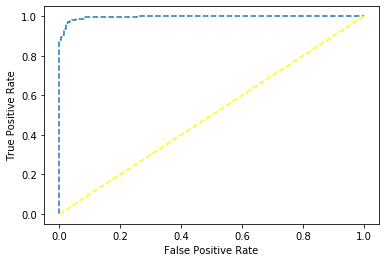

The ROC curve for the test set:


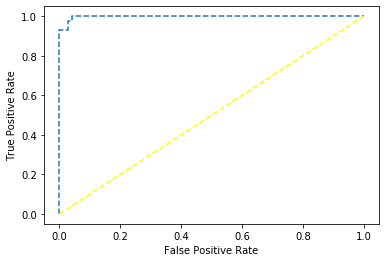

The confusion matrix for the train set is:
[[279   6]
 [  8 161]]


The confusion matrix for the test set is:
[[70  2]
 [ 2 41]]


#########################################
The following stats are for the train set over M runs:
The average accuracy is: 0.9689427312775332
The average precision is: 0.963179771784037
The average recall is: 0.9530571992110455
The average F-score is: 0.958058791569316
The average AUC is: 0.9963659642202153


The following stats are for the test set over M runs:
The average accuracy is: 0.9507246376811591
The average precision is: 0.9370324453561546
The average recall is: 0.9325581395348838
The average F-score is: 0.933869115781015
The average AUC is: 0.9915697674418606


In [71]:
tr_accuracy=[]
tr_precision=[]
tr_recall=[]
tr_fscore=[]
tr_auc=[]

ts_accuracy=[]
ts_precision=[]
ts_recall=[]
ts_fscore=[]
ts_auc=[]


for x in range(1,31):
    BX_train, BX_test, BY_train, BY_test = train_test_split(wdbc_B_X,wdbc_B_Y,test_size=0.20)
    MX_train, MX_test, MY_train, MY_test = train_test_split(wdbc_M_X,wdbc_M_Y,test_size=0.20)
    X_tr=pd.concat([BX_train,MX_train],ignore_index=False)
    X_ts=pd.concat([BX_test,MX_test],ignore_index=False)
    Y_tr=pd.concat([BY_train,MY_train],ignore_index=False)
    Y_ts=pd.concat([BY_test,MY_test],ignore_index=False)

    Y_tr=Y_tr.replace({'B':0,'M':1})
    Y_ts=Y_ts.replace({'B':0,'M':1})

    NX_tr=preprocessing.normalize(X_tr)
    NX_tr_df=pd.DataFrame(data=NX_tr,columns=X_tr.columns)

    NX_ts=preprocessing.normalize(X_ts)
    NX_ts_df=pd.DataFrame(data=NX_ts,columns=X_ts.columns)

    svc_l1sup = LinearSVC(penalty='l1',dual=False)
    params={'C':[0.001,0.01,0.1,10**0,10**1,10**2,10**3]}
    l1sup_clf = GridSearchCV(svc_l1sup, param_grid=params, cv=5)
    l1sup_clf.fit(NX_tr_df, Y_tr)

    
    l1sup_actual = LinearSVC(penalty='l1', C=l1sup_clf.best_params_['C'],dual=False)
    l1sup_actual.fit(NX_tr_df, Y_tr)
    
    l1sup_actual_tr_pred=l1sup_actual.predict(NX_tr_df)
    Y_tr_score=l1sup_actual.decision_function(NX_tr_df)
    tr_accuracy.append(accuracy_score(Y_tr, l1sup_actual_tr_pred))
    tr_precision.append(precision_score(Y_tr, l1sup_actual_tr_pred))
    tr_recall.append(recall_score(Y_tr, l1sup_actual_tr_pred))
    tr_fscore.append(f1_score(Y_tr, l1sup_actual_tr_pred)) 
    tr_auc.append(roc_auc_score(Y_tr, Y_tr_score))
    
    
    
    l1sup_actual_pred=l1sup_actual.predict(NX_ts_df)
    Y_ts_score=l1sup_actual.decision_function(NX_ts_df)
    ts_accuracy.append(accuracy_score(Y_ts, l1sup_actual_pred))
    ts_precision.append(precision_score(Y_ts, l1sup_actual_pred))
    ts_recall.append(recall_score(Y_ts, l1sup_actual_pred))
    ts_fscore.append(f1_score(Y_ts, l1sup_actual_pred)) 
    ts_auc.append(roc_auc_score(Y_ts, Y_ts_score))
    
    
   
    if x==13:
        print("##### This is for the 13th RUN #######")
        print("The ROC curve for the train set:")
        fpr, tpr, thresholds = metrics.roc_curve(Y_tr,Y_tr_score)
        pyplot.plot(fpr, tpr, linestyle='--')
        pyplot.plot([0, 1], [0, 1], color='yellow', linestyle='--')
        pyplot.xlabel('False Positive Rate')
        pyplot.ylabel('True Positive Rate')
        pyplot.show()
       
        print("The ROC curve for the test set:")
        fpr, tpr, thresholds = metrics.roc_curve(Y_ts,Y_ts_score)
        pyplot.plot(fpr, tpr, linestyle='--')
        pyplot.plot([0, 1], [0, 1], color='yellow', linestyle='--')
        pyplot.xlabel('False Positive Rate')
        pyplot.ylabel('True Positive Rate')
        pyplot.show()
    
        print("The confusion matrix for the train set is:")
        print(confusion_matrix(Y_tr,l1sup_actual_tr_pred))
        print('\n')
        print("The confusion matrix for the test set is:")
        print(confusion_matrix(Y_ts,l1sup_actual_pred))
        print('\n')
       
print("#########################################")    
print('The following stats are for the train set over M runs:')
print('The average accuracy is:',np.sum(tr_accuracy)/30)
print('The average precision is:',np.sum(tr_precision)/30)
print('The average recall is:',np.sum(tr_recall)/30)
print('The average F-score is:',np.sum(tr_fscore)/30)
print('The average AUC is:',np.sum(tr_auc)/30)
print('\n')


print('The following stats are for the test set over M runs:')
print('The average accuracy is:',np.sum(ts_accuracy)/30)
print('The average precision is:',np.sum(ts_precision)/30)
print('The average recall is:',np.sum(ts_recall)/30)
print('The average F-score is:',np.sum(ts_fscore)/30)
print('The average AUC is:',np.sum(ts_auc)/30)



### Solution for 1(b)(ii) as below:

I've combined both parts (a) and (b) in the below code block.I've randomly chosen 50% of the positive
class along with 50% of the negative class in the training set as labeled data and the rest as unlabelled data. I've used a comment inside the code to make things clearer as to where the parts A and B start/end.

I've found the ROC and confusion matrices for the 13th run.

##### This is for the 13th RUN #######
The ROC curve for the train set:


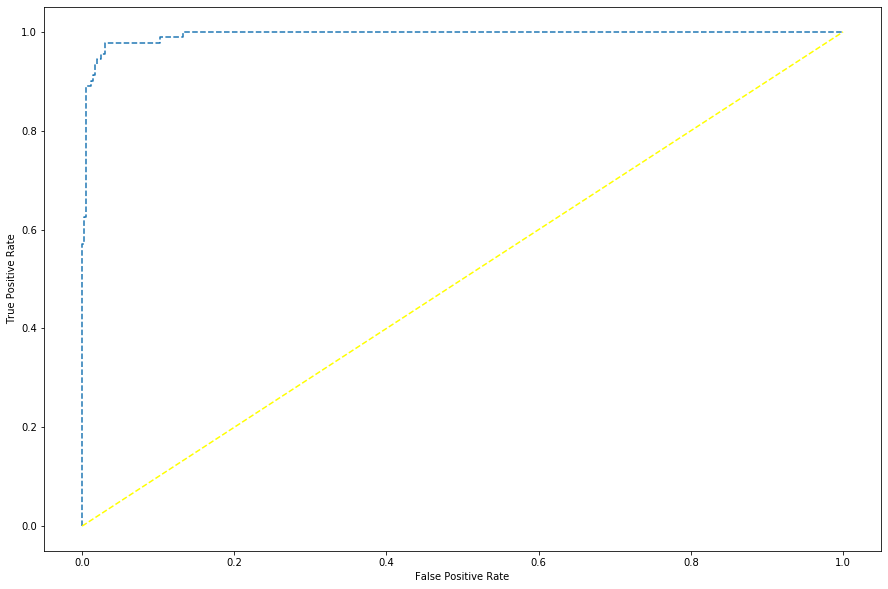

The ROC curve for the test set:


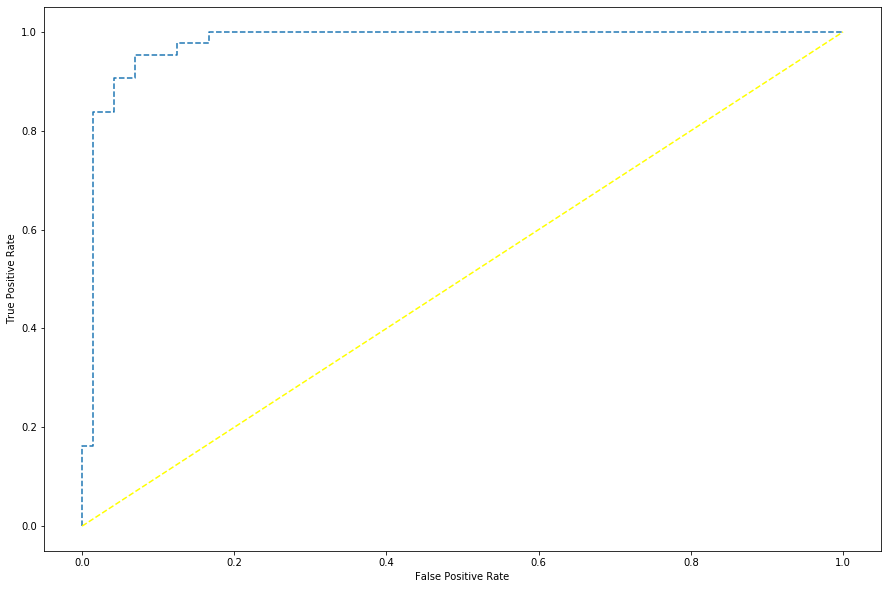

The confusion matrix for the train set is:
[[357   6]
 [  8  83]]


The confusion matrix for the test set is:
[[69  3]
 [ 7 36]]


#########################################
The following stats are for the train set over M runs:
The average accuracy is: 0.9702643171806168
The average precision is: 0.953035884004876
The average recall is: 0.8923351466762892
The average F-score is: 0.9213321785423985
The average AUC is: 0.9923338800708663


The following stats are for the test set over M runs:
The average accuracy is: 0.9420289855072465
The average precision is: 0.974435773436009
The average recall is: 0.8682170542635661
The average F-score is: 0.9168478848489178
The average AUC is: 0.9887381567614125


In [127]:
semi_tr_accuracy=[]
semi_tr_precision=[]
semi_tr_recall=[]
semi_tr_fscore=[]
semi_tr_auc=[]

semi_ts_accuracy=[]
semi_ts_precision=[]
semi_ts_recall=[]
semi_ts_fscore=[]
semi_ts_auc=[]

for x in range(1,31):
    BX_train, BX_test, BY_train, BY_test = train_test_split(wdbc_B_X,wdbc_B_Y,test_size=0.20)
    MX_train, MX_test, MY_train, MY_test = train_test_split(wdbc_M_X,wdbc_M_Y,test_size=0.20)
    X_tr=pd.concat([BX_train,MX_train],ignore_index=False)
    X_ts=pd.concat([BX_test,MX_test],ignore_index=False)
    Y_tr=pd.concat([BY_train,MY_train],ignore_index=False)
    Y_ts=pd.concat([BY_test,MY_test],ignore_index=False)
    trainsup=pd.concat([Y_tr,X_tr],axis=1)

    trainsup_B=trainsup[trainsup['Diagnosis']=='B']
    trainsup_M=trainsup[trainsup['Diagnosis']=='M']

    trainsup_B_Y=trainsup_B[['Diagnosis']]
    trainsup_B_X=trainsup_B.iloc[:,1:]

    trainsup_M_Y=trainsup_M[['Diagnosis']]
    trainsup_M_X=trainsup_M.iloc[:,1:]

    BX_lab_sup, BX_unlab_sup, BY_lab_sup, BY_unlab_sup = train_test_split(trainsup_B_X,trainsup_B_Y,test_size=0.50)
    MX_lab_sup, MX_unlab_sup, MY_lab_sup, MY_unlab_sup = train_test_split(trainsup_M_X,trainsup_M_Y,test_size=0.50)

    B_lab_tr=pd.concat([BY_lab_sup,BX_lab_sup],axis=1)
    M_lab_tr=pd.concat([MY_lab_sup,MX_lab_sup],axis=1)
    lab_tr=pd.concat([B_lab_tr,M_lab_tr],ignore_index=True)
    unlab_tr=pd.concat([BX_unlab_sup,MX_unlab_sup])
    

    Y_lab_tr=lab_tr[['Diagnosis']]
    X_lab_tr=lab_tr.iloc[:,1:]

    Y_lab_tr=Y_lab_tr.replace({'B':0,'M':1})
    Y_ts=Y_ts.replace({'B':0,'M':1})
  

    NX_lab_tr=preprocessing.normalize(X_lab_tr)
    NX_lab_tr_df=pd.DataFrame(data=NX_lab_tr,columns=X_lab_tr.columns)
    
    NX_ts=preprocessing.normalize(X_ts)
    NX_ts_df=pd.DataFrame(data=NX_ts,columns=X_ts.columns)

    svc_semisup = LinearSVC(penalty='l1',dual=False)
    params={'C':[0.001,0.01,0.1,10**0,10**1,10**2,10**3]}
    semisup_clf = GridSearchCV(svc_semisup, param_grid=params, cv=5)
    semisup_clf.fit(NX_lab_tr_df, Y_lab_tr)
    

    semisup_actual = LinearSVC(penalty='l1', C=semisup_clf.best_params_['C'],dual=False)
    semisup_actual.fit(NX_lab_tr_df, Y_lab_tr)
    
    ############part A ends here ############
    ########### part B begins ##############

    y = semisup_actual.decision_function(unlab_tr)
    w_norm = np.linalg.norm(semisup_actual.coef_)
    dist = abs(y / w_norm)
    dist=dist.tolist()
    
    
    for u in range(0,len(dist)):

        new_pred=semisup_actual.predict([unlab_tr.iloc[dist.index(max(dist)),:].values]).tolist()
        new_labpt=unlab_tr.iloc[dist.index(max(dist)),:].values.tolist()
        new_labpt=[new_labpt]

        new_lab_X=pd.DataFrame(data=new_labpt,columns=unlab_tr.columns)
        new_lab_Y=pd.DataFrame({'Diagnosis':new_pred})
        new_lab_pt=pd.concat([new_lab_Y,new_lab_X],axis=1)

        lab_tr=pd.concat([lab_tr,new_lab_pt],ignore_index=True)
        
        dist.pop(dist.index(max(dist)))
       
    
        Y_lab_tr=lab_tr[['Diagnosis']]
        X_lab_tr=lab_tr.iloc[:,1:]

        Y_lab_tr=Y_lab_tr.replace({'B':0,'M':1})

        NX_lab_tr=preprocessing.normalize(X_lab_tr)
        NX_lab_tr_df=pd.DataFrame(data=NX_lab_tr,columns=X_lab_tr.columns)
        
        semisup_actual=LinearSVC(penalty='l1', C=semisup_clf.best_params_['C'],dual=False)
        semisup_actual.fit(NX_lab_tr_df, Y_lab_tr)
     
    semisup_actual_tr_pred=semisup_actual.predict(NX_lab_tr_df)
    Y_trsemi_score=semisup_actual.decision_function(NX_lab_tr_df)
    semi_tr_accuracy.append(accuracy_score(Y_lab_tr, semisup_actual_tr_pred))
    semi_tr_precision.append(precision_score(Y_lab_tr, semisup_actual_tr_pred))
    semi_tr_recall.append(recall_score(Y_lab_tr, semisup_actual_tr_pred))
    semi_tr_fscore.append(f1_score(Y_lab_tr, semisup_actual_tr_pred)) 
    semi_tr_auc.append(roc_auc_score(Y_lab_tr, Y_trsemi_score))
    
    
    
    semisup_actual_pred=semisup_actual.predict(NX_ts_df)
    Y_tssemi_score=semisup_actual.decision_function(NX_ts_df)
    semi_ts_accuracy.append(accuracy_score(Y_ts, semisup_actual_pred))
    semi_ts_precision.append(precision_score(Y_ts, semisup_actual_pred))
    semi_ts_recall.append(recall_score(Y_ts, semisup_actual_pred))
    semi_ts_fscore.append(f1_score(Y_ts, semisup_actual_pred)) 
    semi_ts_auc.append(roc_auc_score(Y_ts, Y_tssemi_score))
    
    if x==13:
        print("##### This is for the 13th RUN #######")
        print("The ROC curve for the train set:")
        fpr, tpr, thresholds = metrics.roc_curve(Y_lab_tr,Y_trsemi_score)
        pyplot.plot(fpr, tpr, linestyle='--')
        pyplot.plot([0, 1], [0, 1], color='yellow', linestyle='--')
        pyplot.xlabel('False Positive Rate')
        pyplot.ylabel('True Positive Rate')
        pyplot.show()
       
        print("The ROC curve for the test set:")
        fpr, tpr, thresholds = metrics.roc_curve(Y_ts,Y_tssemi_score)
        pyplot.plot(fpr, tpr, linestyle='--')
        pyplot.plot([0, 1], [0, 1], color='yellow', linestyle='--')
        pyplot.xlabel('False Positive Rate')
        pyplot.ylabel('True Positive Rate')
        pyplot.show()
    
        print("The confusion matrix for the train set is:")
        print(confusion_matrix(Y_lab_tr,semisup_actual_tr_pred))
        print('\n')
        print("The confusion matrix for the test set is:")
        print(confusion_matrix(Y_ts,semisup_actual_pred))
        print('\n')
        
    
print("#########################################")    
print('The following stats are for the train set over M runs:')
print('The average accuracy is:',np.sum(semi_tr_accuracy)/30)
print('The average precision is:',np.sum(semi_tr_precision)/30)
print('The average recall is:',np.sum(semi_tr_recall)/30)
print('The average F-score is:',np.sum(semi_tr_fscore)/30)
print('The average AUC is:',np.sum(semi_tr_auc)/30)
print('\n')


print('The following stats are for the test set over M runs:')
print('The average accuracy is:',np.sum(semi_ts_accuracy)/30)
print('The average precision is:',np.sum(semi_ts_precision)/30)
print('The average recall is:',np.sum(semi_ts_recall)/30)
print('The average F-score is:',np.sum(semi_ts_fscore)/30)
print('The average AUC is:',np.sum(semi_ts_auc)/30)

#############Part B ends ###############
        

### Solution to 1(b)(iii) as below:

I've combined both parts (a),(b) and (c) in the below code block. I've used a comment inside the code to make things clearer as to where the parts A,B,C start/end.

We make sure K-means is initialised randomly by using "init = 'random'" parameter inside the KMeans function.

We make make sure that the algorithm was not trapped in a local minimum,by restarting it multiple times. This is taken care by the max_iter parameters, which restarts the algorithm many times. Also, n_init=10(by default) helps in prevention against trapping in a local minimum.

We draw the ROC and confusion matrix for the 13th run of both test and train data

##### This is for the 13th RUN #######
The ROC curve for the train set:


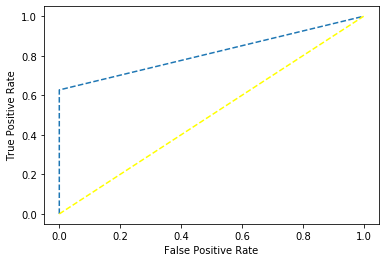

The ROC curve for the test set:


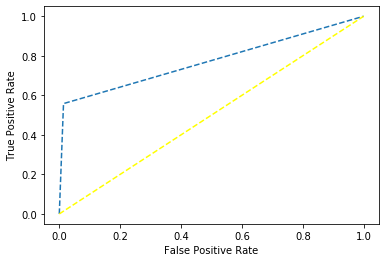

The confusion matrix for the train set is:
[[285   0]
 [ 63 106]]


The confusion matrix for the test set is:
[[71  1]
 [19 24]]


#########################################
The following stats are for the train set over M runs:
The average accuracy is: 0.8531571218795887
The average precision is: 0.9932187841749399
The average recall is: 0.609664694280079
The average F-score is: 0.7552968551512426
The average AUC is: 0.8036042769646007


The following stats are for the test set over M runs:
The average accuracy is: 0.8486956521739129
The average precision is: 0.9886237660772328
The average recall is: 0.6023255813953488
The average F-score is: 0.7472424556294481
The average AUC is: 0.7990794573643413


In [74]:
unsup_tr_accuracy=[]
unsup_tr_precision=[]
unsup_tr_recall=[]
unsup_tr_fscore=[]
unsup_tr_auc=[]

unsup_ts_accuracy=[]
unsup_ts_precision=[]
unsup_ts_recall=[]
unsup_ts_fscore=[]
unsup_ts_auc=[]

for p in range(1,31):
    BX_train, BX_test, BY_train, BY_test = train_test_split(wdbc_B_X,wdbc_B_Y,test_size=0.20)
    MX_train, MX_test, MY_train, MY_test = train_test_split(wdbc_M_X,wdbc_M_Y,test_size=0.20)
    X_tr=pd.concat([BX_train,MX_train],ignore_index=False)
    X_ts=pd.concat([BX_test,MX_test],ignore_index=False)
    Y_tr=pd.concat([BY_train,MY_train],ignore_index=False)
    Y_ts=pd.concat([BY_test,MY_test],ignore_index=False)


    unsup_tr=pd.concat([Y_tr,X_tr],axis=1)
    unsup_ts=pd.concat([Y_ts,X_ts],axis=1)
    unsup_trK=unsup_tr.iloc[:,1:]
    unsup_tsK=unsup_ts.iloc[:,1:]

    usk=KMeans(init = 'random',n_clusters=2,max_iter=500).fit(unsup_trK)
    labels=usk.labels_.tolist()
    ############## Part A ends ################
    ############## Part B and C begin ############
    cl0_dist=[]
    cl1_dist=[]
    cl0_df=[]
    cl1_df=[]
    labels_pred=[]
    labels_ts_pred=[]


    for x in range(0,len(unsup_trK.values)):
        cl0_dist.append(np.linalg.norm(unsup_trK.values[x]-usk.cluster_centers_[0]))
    
    for x in range(0,len(unsup_trK.values)):
        cl1_dist.append(np.linalg.norm(unsup_trK.values[x]-usk.cluster_centers_[1]))
    
    cl0_dist_sort=cl0_dist.copy()
    cl0_dist_sort.sort()
    req_cl0=cl0_dist_sort[:30]
    for x in req_cl0:
        cl0_df.append(cl0_dist.index(x))


    cl1_dist_sort=cl1_dist.copy()
    cl1_dist_sort.sort()
    req_cl1=cl1_dist_sort[:30]
    for x in req_cl1:
        cl1_df.append(cl1_dist.index(x))
    
    y0_true_lab=unsup_tr.iloc[cl0_df,:1]
    y1_true_lab=unsup_tr.iloc[cl1_df,:1]
    y0=y0_true_lab['Diagnosis'].value_counts().argmax()
    y1=y1_true_lab['Diagnosis'].value_counts().argmax()

    for x in labels:
        if x == 0:
            labels_pred.append(y0)
        else:
            labels_pred.append(y1)
        
    labels_pred_df=pd.DataFrame({'PredLab':labels_pred})
    labels_true_df=unsup_tr[['Diagnosis']]

    labels_pred_df=labels_pred_df.replace({'B':0,'M':1})
    labels_true_df=labels_true_df.replace({'B':0,'M':1})

    unsup_tr_accuracy.append(accuracy_score(labels_true_df, labels_pred_df))
    unsup_tr_precision.append(precision_score(labels_true_df, labels_pred_df))
    unsup_tr_recall.append(recall_score(labels_true_df, labels_pred_df))
    unsup_tr_fscore.append(f1_score(labels_true_df, labels_pred_df)) 
    unsup_tr_auc.append(roc_auc_score(labels_true_df, labels_pred_df))

    labels_ts=usk.predict(unsup_tsK).tolist()
    for x in labels_ts:
        if x == 0:
            labels_ts_pred.append(y0)
        else:
            labels_ts_pred.append(y1)
        
    labels_ts_pred_df=pd.DataFrame({'PredLab':labels_ts_pred})
    labels_ts_true_df=unsup_ts[['Diagnosis']]

    labels_ts_pred_df=labels_ts_pred_df.replace({'B':0,'M':1})
    labels_ts_true_df=labels_ts_true_df.replace({'B':0,'M':1})

    unsup_ts_accuracy.append(accuracy_score(labels_ts_true_df, labels_ts_pred_df))
    unsup_ts_precision.append(precision_score(labels_ts_true_df, labels_ts_pred_df))
    unsup_ts_recall.append(recall_score(labels_ts_true_df, labels_ts_pred_df))
    unsup_ts_fscore.append(f1_score(labels_ts_true_df, labels_ts_pred_df)) 
    unsup_ts_auc.append(roc_auc_score(labels_ts_true_df, labels_ts_pred_df))
    
    if p==13:
        print("##### This is for the 13th RUN #######")
        print("The ROC curve for the train set:")
        fpr, tpr, thresholds = metrics.roc_curve(labels_true_df,labels_pred_df)
        pyplot.plot(fpr, tpr, linestyle='--')
        pyplot.plot([0, 1], [0, 1], color='yellow', linestyle='--')
        pyplot.xlabel('False Positive Rate')
        pyplot.ylabel('True Positive Rate')
        pyplot.show()
       
        print("The ROC curve for the test set:")
        fpr, tpr, thresholds = metrics.roc_curve(labels_ts_true_df,labels_ts_pred_df)
        pyplot.plot(fpr, tpr, linestyle='--')
        pyplot.plot([0, 1], [0, 1], color='yellow', linestyle='--')
        pyplot.xlabel('False Positive Rate')
        pyplot.ylabel('True Positive Rate')
        pyplot.show()
    
        print("The confusion matrix for the train set is:")
        print(confusion_matrix(labels_true_df, labels_pred_df))
        print('\n')
        print("The confusion matrix for the test set is:")
        print(confusion_matrix(labels_ts_true_df, labels_ts_pred_df))
        print('\n')

    
print("#########################################")    
print('The following stats are for the train set over M runs:')
print('The average accuracy is:',np.sum(unsup_tr_accuracy)/30)
print('The average precision is:',np.sum(unsup_tr_precision)/30)
print('The average recall is:',np.sum(unsup_tr_recall)/30)
print('The average F-score is:',np.sum(unsup_tr_fscore)/30)
print('The average AUC is:',np.sum(unsup_tr_auc)/30)
print('\n')


print('The following stats are for the test set over M runs:')
print('The average accuracy is:',np.sum(unsup_ts_accuracy)/30)
print('The average precision is:',np.sum(unsup_ts_precision)/30)
print('The average recall is:',np.sum(unsup_ts_recall)/30)
print('The average F-score is:',np.sum(unsup_ts_fscore)/30)
print('The average AUC is:',np.sum(unsup_ts_auc)/30)






### Solution to 1(b)(iv) as below:

We're using kernel as 'rbf' and gamma =1 to meet the requirements of the question.

We draw the ROC and confusion matrix for the 13th run.

##### This is for the 13th RUN #######
The ROC curve for the train set:


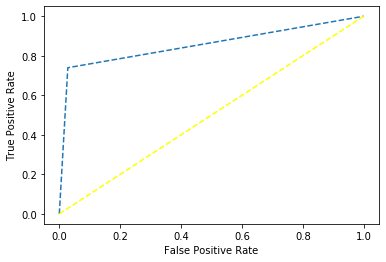

The ROC curve for the test set:


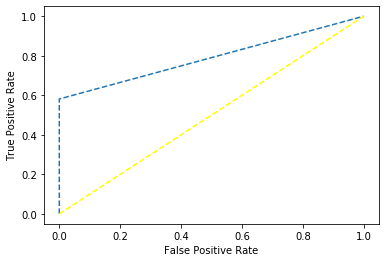

The confusion matrix for the train set is:
[[277   8]
 [ 44 125]]


The confusion matrix for the test set is:
[[72  0]
 [18 25]]


#########################################
The following stats are for the train set over M runs:
The average accuracy is: 0.881718061674009
The average precision is: 0.9582084610037798
The average recall is: 0.7136094674556213
The average F-score is: 0.8177163525761201
The average AUC is: 0.8475064881137756


The following stats are for the test set over M runs:
The average accuracy is: 0.6779710144927537
The average precision is: 0.7339015478703756
The average recall is: 0.5992248062015505
The average F-score is: 0.6482141118277488
The average AUC is: 0.6621124031007751


In [131]:
unsup_tr_accuracy=[]
unsup_tr_precision=[]
unsup_tr_recall=[]
unsup_tr_fscore=[]
unsup_tr_auc=[]

unsup_ts_accuracy=[]
unsup_ts_precision=[]
unsup_ts_recall=[]
unsup_ts_fscore=[]
unsup_ts_auc=[]

for p in range(1,31):

    BX_train, BX_test, BY_train, BY_test = train_test_split(wdbc_B_X,wdbc_B_Y,test_size=0.20)
    MX_train, MX_test, MY_train, MY_test = train_test_split(wdbc_M_X,wdbc_M_Y,test_size=0.20)
    X_tr=pd.concat([BX_train,MX_train],ignore_index=False)
    X_ts=pd.concat([BX_test,MX_test],ignore_index=False)
    Y_tr=pd.concat([BY_train,MY_train],ignore_index=False)
    Y_ts=pd.concat([BY_test,MY_test],ignore_index=False)

    c0=[]
    c1=[]
    labels_tr_pred=[]
    labels_ts_pred=[]

    unsup_tr=pd.concat([Y_tr,X_tr],axis=1)
    unsup_ts=pd.concat([Y_ts,X_ts],axis=1)
    unsup_trC=unsup_tr.iloc[:,1:]
    unsup_tsC=unsup_ts.iloc[:,1:]

    unsup_trCN=preprocessing.normalize(unsup_trC)
    unsup_trCN_df=pd.DataFrame(data=unsup_trCN,columns=unsup_trC.columns)

    unsup_tsCN=preprocessing.normalize(unsup_tsC)
    unsup_tsCN_df=pd.DataFrame(data=unsup_tsCN,columns=unsup_tsC.columns)


    usC = SpectralClustering(n_clusters=2,gamma=1,affinity='rbf')
    labels = usC.fit_predict(unsup_trCN_df)
    labels=labels.tolist()

    for x in range(0,len(labels)):
        if labels[x]==0:
            c0.append(x)
        else:
            c1.append(x)
        
    c0_lab=unsup_tr.iloc[c0,:1]
    c1_lab=unsup_tr.iloc[c1,:1]
    c0_lab_maj=c0_lab.sample(30)
    c1_lab_maj=c1_lab.sample(30)
    y0=c0_lab_maj['Diagnosis'].value_counts().argmax()
    y1=c1_lab_maj['Diagnosis'].value_counts().argmax()

    for x in labels:
        if x == 0:
            labels_tr_pred.append(y0)
        else:
            labels_tr_pred.append(y1)

    labels_tr_pred_df=pd.DataFrame({'PredLab':labels_tr_pred})
    labels_tr_true_df=unsup_tr[['Diagnosis']]

    labels_tr_pred_df=labels_tr_pred_df.replace({'B':0,'M':1})
    labels_tr_true_df=labels_tr_true_df.replace({'B':0,'M':1})

    unsup_tr_accuracy.append(accuracy_score(labels_tr_true_df, labels_tr_pred_df))
    unsup_tr_precision.append(precision_score(labels_tr_true_df, labels_tr_pred_df))
    unsup_tr_recall.append(recall_score(labels_tr_true_df, labels_tr_pred_df))
    unsup_tr_fscore.append(f1_score(labels_tr_true_df, labels_tr_pred_df)) 
    unsup_tr_auc.append(roc_auc_score(labels_tr_true_df, labels_tr_pred_df))

    labels_ts = usC.fit_predict(unsup_tsCN_df).tolist()

    for x in labels_ts:
        if x == 0:
            labels_ts_pred.append(y0)
        else:
            labels_ts_pred.append(y1)

    labels_ts_pred_df=pd.DataFrame({'PredLab':labels_ts_pred})
    labels_ts_true_df=unsup_ts[['Diagnosis']]

    labels_ts_pred_df=labels_ts_pred_df.replace({'B':0,'M':1})
    labels_ts_true_df=labels_ts_true_df.replace({'B':0,'M':1})

    unsup_ts_accuracy.append(accuracy_score(labels_ts_true_df, labels_ts_pred_df))
    unsup_ts_precision.append(precision_score(labels_ts_true_df, labels_ts_pred_df))
    unsup_ts_recall.append(recall_score(labels_ts_true_df, labels_ts_pred_df))
    unsup_ts_fscore.append(f1_score(labels_ts_true_df, labels_ts_pred_df)) 
    unsup_ts_auc.append(roc_auc_score(labels_ts_true_df, labels_ts_pred_df))
    
    if p==13:
        print("##### This is for the 13th RUN #######")
        print("The ROC curve for the train set:")
        fpr, tpr, thresholds = metrics.roc_curve(labels_tr_true_df,labels_tr_pred_df)
        pyplot.plot(fpr, tpr, linestyle='--')
        pyplot.plot([0, 1], [0, 1], color='yellow', linestyle='--')
        pyplot.xlabel('False Positive Rate')
        pyplot.ylabel('True Positive Rate')
        pyplot.show()
       
        print("The ROC curve for the test set:")
        fpr, tpr, thresholds = metrics.roc_curve(labels_ts_true_df,labels_ts_pred_df)
        pyplot.plot(fpr, tpr, linestyle='--')
        pyplot.plot([0, 1], [0, 1], color='yellow', linestyle='--')
        pyplot.xlabel('False Positive Rate')
        pyplot.ylabel('True Positive Rate')
        pyplot.show()
    
        print("The confusion matrix for the train set is:")
        print(confusion_matrix(labels_tr_true_df, labels_tr_pred_df))
        print('\n')
        print("The confusion matrix for the test set is:")
        print(confusion_matrix(labels_ts_true_df, labels_ts_pred_df))
        print('\n')

print("#########################################")    
print('The following stats are for the train set over M runs:')
print('The average accuracy is:',np.sum(unsup_tr_accuracy)/30)
print('The average precision is:',np.sum(unsup_tr_precision)/30)
print('The average recall is:',np.sum(unsup_tr_recall)/30)
print('The average F-score is:',np.sum(unsup_tr_fscore)/30)
print('The average AUC is:',np.sum(unsup_tr_auc)/30)
print('\n')


print('The following stats are for the test set over M runs:')
print('The average accuracy is:',np.sum(unsup_ts_accuracy)/30)
print('The average precision is:',np.sum(unsup_ts_precision)/30)
print('The average recall is:',np.sum(unsup_ts_recall)/30)
print('The average F-score is:',np.sum(unsup_ts_fscore)/30)
print('The average AUC is:',np.sum(unsup_ts_auc)/30)






### Solution to 1(b)(v) as below:

We compare approximate statistics that we obtained from the different kinds of learnings. We can clearly see that in terms of performance/accuracy the following perform in the descending order : Supervised > Semi-Supervised > Unsupervised. For this dataset, we find the same order as above for recall, f-score and AUC as well. Their precisions are comparable for this dataset.

In [136]:
comp=pd.DataFrame({"Types":['Supervised','Semi-Supervised','Unsupervised'],"Accuracy":[0.95,0.94,0.84],"Precision":[0.93,0.97,0.98]
            ,"Recall":[0.93,0.86,0.60],"F-score":[0.93,0.91,0.74],"AUC":[0.99,0.98,0.79]})   

In [137]:
comp

,Types,Accuracy,Precision,Recall,F-score,AUC
0,Supervised,0.95,0.93,0.93,0.93,0.99
1,Semi-Supervised,0.94,0.97,0.86,0.91,0.98
2,Unsupervised,0.84,0.98,0.60,0.74,0.79


### Solution to 2(a) as below:

Downloading the required dataset below:

In [2]:
bankn=pd.read_csv('/Users/sharadsharma/Downloads/data_banknote_authentication.csv',names=['variance','skewness','curtosis','entropy','class'])                  

In [3]:
bankn.shape

(1372, 5)

In [4]:
bankn.head(5)

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


Choosing 472 data points randomly as the test set, and the remaining 900 points as the training set.

In [5]:
bankn_tr ,bankn_ts = train_test_split(bankn,test_size=0.344)

In [6]:
bankn_tr.shape

(900, 5)

In [7]:
bankn_ts.shape

(472, 5)

### Solution to 2(b)(i) as below:

We've outputted the error of all the 90 SVMs for each of the 50 Iterations. (Implementing passive learning).
We further use a dictionary to store the results of the 50 values for each of the 90 SVMs. 

In [77]:
def dfn(p,listx):
    listx.append(p)
    
dis = {}
for x in range(1,91):
    dis['avg_svm'+str(x)] = []


for x in range(1,51):
    bankn=pd.read_csv('/Users/sharadsharma/Downloads/data_banknote_authentication.csv',names=['variance','skewness','curtosis','entropy','class'])                  
    bankn_tr ,bankn_ts = train_test_split(bankn,test_size=0.344)
    X_bankn_ts=bankn_ts.iloc[:,0:4]
    Y_bankn_ts=bankn_ts[['class']]
    
    print("#######These are the test errors for the",x,"th iteration#########")
    
    tr_use_final = pd.DataFrame(columns=['variance','skewness','curtosis','entropy','class'])
    sum=0
    
    while len(bankn_tr)>10:
        tr_use,bankn_tr=train_test_split(bankn_tr,train_size=10)
        tr_use_final=pd.concat([tr_use_final,tr_use])
        X_tr_use=tr_use_final.iloc[:,0:4]
        Y_tr_use=tr_use_final[['class']]
        Y_tr_use=Y_tr_use.astype('int')
        pssv_svc = LinearSVC(penalty='l1',dual=False)
        params={'C':[0.001,0.01,0.1,10**0,10**1,10**2,10**3]}
        pssv_clf = GridSearchCV(pssv_svc, param_grid=params, cv=StratifiedKFold(n_splits=5))
        pssv_clf.fit(X_tr_use, Y_tr_use.values.ravel(),groups=None)
        
        pssv_clf_actual = LinearSVC(penalty='l1', C=pssv_clf.best_params_['C'],dual=False)
        pssv_clf_actual.fit(X_tr_use, Y_tr_use)
        
        pssv_pred=pssv_clf_actual.predict(X_bankn_ts)
        sum=sum+1
        print("The test error for SVM",sum,"is:",1-accuracy_score(Y_bankn_ts, pssv_pred)) 
        dfn(1-accuracy_score(Y_bankn_ts, pssv_pred),dis['avg_svm'+str(sum)])

    tr_use_final=pd.concat([tr_use_final,bankn_tr])
    X_tr_use=tr_use_final.iloc[:,0:4]
    Y_tr_use=tr_use_final[['class']]
    Y_tr_use=Y_tr_use.astype('int')
    pssv_svc = LinearSVC(penalty='l1',dual=False)
    params={'C':[0.001,0.01,0.1,10**0,10**1,10**2,10**3]}
    pssv_clf = GridSearchCV(pssv_svc, param_grid=params, cv=StratifiedKFold(n_splits=5))
    pssv_clf.fit(X_tr_use, Y_tr_use.values.ravel(),groups=None)
    
    pssv_clf_actual = LinearSVC(penalty='l1', C=pssv_clf.best_params_['C'],dual=False)
    pssv_clf_actual.fit(X_tr_use, Y_tr_use)
    
    pssv_pred=pssv_clf_actual.predict(X_bankn_ts)
    print("The test error is SVM 90 is:",1-accuracy_score(Y_bankn_ts, pssv_pred))
    dfn(1-accuracy_score(Y_bankn_ts, pssv_pred),dis['avg_svm90'])
    print('\n')
   
    





#######These are the test errors for the 1 th iteration#########
The test error for SVM 1 is: 0.14194915254237284
The test error for SVM 2 is: 0.11440677966101698
The test error for SVM 3 is: 0.025423728813559365
The test error for SVM 4 is: 0.06991525423728817
The test error for SVM 5 is: 0.02330508474576276
The test error for SVM 6 is: 0.010593220338983023
The test error for SVM 7 is: 0.008474576271186418
The test error for SVM 8 is: 0.008474576271186418
The test error for SVM 9 is: 0.008474576271186418
The test error for SVM 10 is: 0.008474576271186418
The test error for SVM 11 is: 0.006355932203389814
The test error for SVM 12 is: 0.006355932203389814
The test error for SVM 13 is: 0.008474576271186418
The test error for SVM 14 is: 0.008474576271186418
The test error for SVM 15 is: 0.008474576271186418
The test error for SVM 16 is: 0.008474576271186418
The test error for SVM 17 is: 0.008474576271186418
The test error for SVM 18 is: 0.006355932203389814
The test error for SVM 19 is: 

The test error for SVM 70 is: 0.006355932203389814
The test error for SVM 71 is: 0.006355932203389814
The test error for SVM 72 is: 0.006355932203389814
The test error for SVM 73 is: 0.006355932203389814
The test error for SVM 74 is: 0.006355932203389814
The test error for SVM 75 is: 0.004237288135593209
The test error for SVM 76 is: 0.004237288135593209
The test error for SVM 77 is: 0.004237288135593209
The test error for SVM 78 is: 0.006355932203389814
The test error for SVM 79 is: 0.006355932203389814
The test error for SVM 80 is: 0.006355932203389814
The test error for SVM 81 is: 0.006355932203389814
The test error for SVM 82 is: 0.006355932203389814
The test error for SVM 83 is: 0.006355932203389814
The test error for SVM 84 is: 0.006355932203389814
The test error for SVM 85 is: 0.006355932203389814
The test error for SVM 86 is: 0.006355932203389814
The test error for SVM 87 is: 0.006355932203389814
The test error for SVM 88 is: 0.006355932203389814
The test error for SVM 89 is: 0

The test error for SVM 50 is: 0.014830508474576232
The test error for SVM 51 is: 0.014830508474576232
The test error for SVM 52 is: 0.014830508474576232
The test error for SVM 53 is: 0.014830508474576232
The test error for SVM 54 is: 0.014830508474576232
The test error for SVM 55 is: 0.014830508474576232
The test error for SVM 56 is: 0.014830508474576232
The test error for SVM 57 is: 0.014830508474576232
The test error for SVM 58 is: 0.014830508474576232
The test error for SVM 59 is: 0.014830508474576232
The test error for SVM 60 is: 0.014830508474576232
The test error for SVM 61 is: 0.014830508474576232
The test error for SVM 62 is: 0.014830508474576232
The test error for SVM 63 is: 0.014830508474576232
The test error for SVM 64 is: 0.014830508474576232
The test error for SVM 65 is: 0.014830508474576232
The test error for SVM 66 is: 0.014830508474576232
The test error for SVM 67 is: 0.014830508474576232
The test error for SVM 68 is: 0.014830508474576232
The test error for SVM 69 is: 0

The test error for SVM 30 is: 0.012711864406779627
The test error for SVM 31 is: 0.012711864406779627
The test error for SVM 32 is: 0.016949152542372836
The test error for SVM 33 is: 0.012711864406779627
The test error for SVM 34 is: 0.016949152542372836
The test error for SVM 35 is: 0.012711864406779627
The test error for SVM 36 is: 0.016949152542372836
The test error for SVM 37 is: 0.016949152542372836
The test error for SVM 38 is: 0.016949152542372836
The test error for SVM 39 is: 0.016949152542372836
The test error for SVM 40 is: 0.016949152542372836
The test error for SVM 41 is: 0.016949152542372836
The test error for SVM 42 is: 0.008474576271186418
The test error for SVM 43 is: 0.008474576271186418
The test error for SVM 44 is: 0.016949152542372836
The test error for SVM 45 is: 0.016949152542372836
The test error for SVM 46 is: 0.016949152542372836
The test error for SVM 47 is: 0.016949152542372836
The test error for SVM 48 is: 0.016949152542372836
The test error for SVM 49 is: 0

The test error for SVM 10 is: 0.02330508474576276
The test error for SVM 11 is: 0.02330508474576276
The test error for SVM 12 is: 0.02330508474576276
The test error for SVM 13 is: 0.014830508474576232
The test error for SVM 14 is: 0.02330508474576276
The test error for SVM 15 is: 0.010593220338983023
The test error for SVM 16 is: 0.010593220338983023
The test error for SVM 17 is: 0.014830508474576232
The test error for SVM 18 is: 0.010593220338983023
The test error for SVM 19 is: 0.010593220338983023
The test error for SVM 20 is: 0.014830508474576232
The test error for SVM 21 is: 0.010593220338983023
The test error for SVM 22 is: 0.014830508474576232
The test error for SVM 23 is: 0.014830508474576232
The test error for SVM 24 is: 0.014830508474576232
The test error for SVM 25 is: 0.014830508474576232
The test error for SVM 26 is: 0.014830508474576232
The test error for SVM 27 is: 0.014830508474576232
The test error for SVM 28 is: 0.014830508474576232
The test error for SVM 29 is: 0.014

The test error for SVM 80 is: 0.014830508474576232
The test error for SVM 81 is: 0.014830508474576232
The test error for SVM 82 is: 0.014830508474576232
The test error for SVM 83 is: 0.014830508474576232
The test error for SVM 84 is: 0.014830508474576232
The test error for SVM 85 is: 0.014830508474576232
The test error for SVM 86 is: 0.014830508474576232
The test error for SVM 87 is: 0.014830508474576232
The test error for SVM 88 is: 0.014830508474576232
The test error for SVM 89 is: 0.014830508474576232
The test error is SVM 90 is: 0.014830508474576232


#######These are the test errors for the 10 th iteration#########
The test error for SVM 1 is: 0.11016949152542377
The test error for SVM 2 is: 0.06144067796610164
The test error for SVM 3 is: 0.06991525423728817
The test error for SVM 4 is: 0.05932203389830504
The test error for SVM 5 is: 0.07203389830508478
The test error for SVM 6 is: 0.03389830508474578
The test error for SVM 7 is: 0.029661016949152574
The test error for SVM 8 is:

The test error for SVM 64 is: 0.0
The test error for SVM 65 is: 0.0
The test error for SVM 66 is: 0.0
The test error for SVM 67 is: 0.0
The test error for SVM 68 is: 0.0
The test error for SVM 69 is: 0.0
The test error for SVM 70 is: 0.0
The test error for SVM 71 is: 0.0
The test error for SVM 72 is: 0.0
The test error for SVM 73 is: 0.0
The test error for SVM 74 is: 0.0021186440677966045
The test error for SVM 75 is: 0.0021186440677966045
The test error for SVM 76 is: 0.0021186440677966045
The test error for SVM 77 is: 0.0021186440677966045
The test error for SVM 78 is: 0.0021186440677966045
The test error for SVM 79 is: 0.0021186440677966045
The test error for SVM 80 is: 0.0021186440677966045
The test error for SVM 81 is: 0.0021186440677966045
The test error for SVM 82 is: 0.0
The test error for SVM 83 is: 0.0021186440677966045
The test error for SVM 84 is: 0.0021186440677966045
The test error for SVM 85 is: 0.0021186440677966045
The test error for SVM 86 is: 0.0021186440677966045
Th

The test error for SVM 46 is: 0.006355932203389814
The test error for SVM 47 is: 0.006355932203389814
The test error for SVM 48 is: 0.006355932203389814
The test error for SVM 49 is: 0.004237288135593209
The test error for SVM 50 is: 0.004237288135593209
The test error for SVM 51 is: 0.006355932203389814
The test error for SVM 52 is: 0.004237288135593209
The test error for SVM 53 is: 0.004237288135593209
The test error for SVM 54 is: 0.004237288135593209
The test error for SVM 55 is: 0.004237288135593209
The test error for SVM 56 is: 0.004237288135593209
The test error for SVM 57 is: 0.004237288135593209
The test error for SVM 58 is: 0.006355932203389814
The test error for SVM 59 is: 0.006355932203389814
The test error for SVM 60 is: 0.006355932203389814
The test error for SVM 61 is: 0.008474576271186418
The test error for SVM 62 is: 0.008474576271186418
The test error for SVM 63 is: 0.008474576271186418
The test error for SVM 64 is: 0.008474576271186418
The test error for SVM 65 is: 0

The test error for SVM 25 is: 0.010593220338983023
The test error for SVM 26 is: 0.008474576271186418
The test error for SVM 27 is: 0.012711864406779627
The test error for SVM 28 is: 0.012711864406779627
The test error for SVM 29 is: 0.012711864406779627
The test error for SVM 30 is: 0.012711864406779627
The test error for SVM 31 is: 0.012711864406779627
The test error for SVM 32 is: 0.012711864406779627
The test error for SVM 33 is: 0.012711864406779627
The test error for SVM 34 is: 0.012711864406779627
The test error for SVM 35 is: 0.012711864406779627
The test error for SVM 36 is: 0.012711864406779627
The test error for SVM 37 is: 0.012711864406779627
The test error for SVM 38 is: 0.012711864406779627
The test error for SVM 39 is: 0.012711864406779627
The test error for SVM 40 is: 0.012711864406779627
The test error for SVM 41 is: 0.012711864406779627
The test error for SVM 42 is: 0.012711864406779627
The test error for SVM 43 is: 0.012711864406779627
The test error for SVM 44 is: 0

The test error for SVM 6 is: 0.025423728813559365
The test error for SVM 7 is: 0.01906779661016944
The test error for SVM 8 is: 0.014830508474576232
The test error for SVM 9 is: 0.014830508474576232
The test error for SVM 10 is: 0.010593220338983023
The test error for SVM 11 is: 0.012711864406779627
The test error for SVM 12 is: 0.010593220338983023
The test error for SVM 13 is: 0.010593220338983023
The test error for SVM 14 is: 0.008474576271186418
The test error for SVM 15 is: 0.008474576271186418
The test error for SVM 16 is: 0.010593220338983023
The test error for SVM 17 is: 0.010593220338983023
The test error for SVM 18 is: 0.010593220338983023
The test error for SVM 19 is: 0.010593220338983023
The test error for SVM 20 is: 0.010593220338983023
The test error for SVM 21 is: 0.010593220338983023
The test error for SVM 22 is: 0.010593220338983023
The test error for SVM 23 is: 0.010593220338983023
The test error for SVM 24 is: 0.010593220338983023
The test error for SVM 25 is: 0.0105

The test error for SVM 76 is: 0.008474576271186418
The test error for SVM 77 is: 0.008474576271186418
The test error for SVM 78 is: 0.008474576271186418
The test error for SVM 79 is: 0.008474576271186418
The test error for SVM 80 is: 0.008474576271186418
The test error for SVM 81 is: 0.008474576271186418
The test error for SVM 82 is: 0.008474576271186418
The test error for SVM 83 is: 0.008474576271186418
The test error for SVM 84 is: 0.008474576271186418
The test error for SVM 85 is: 0.008474576271186418
The test error for SVM 86 is: 0.008474576271186418
The test error for SVM 87 is: 0.008474576271186418
The test error for SVM 88 is: 0.008474576271186418
The test error for SVM 89 is: 0.008474576271186418
The test error is SVM 90 is: 0.008474576271186418


#######These are the test errors for the 19 th iteration#########
The test error for SVM 1 is: 0.15889830508474578
The test error for SVM 2 is: 0.14194915254237284
The test error for SVM 3 is: 0.1313559322033898
The test error for SVM

The test error for SVM 57 is: 0.014830508474576232
The test error for SVM 58 is: 0.014830508474576232
The test error for SVM 59 is: 0.014830508474576232
The test error for SVM 60 is: 0.014830508474576232
The test error for SVM 61 is: 0.014830508474576232
The test error for SVM 62 is: 0.014830508474576232
The test error for SVM 63 is: 0.01906779661016944
The test error for SVM 64 is: 0.01906779661016944
The test error for SVM 65 is: 0.01906779661016944
The test error for SVM 66 is: 0.01906779661016944
The test error for SVM 67 is: 0.01906779661016944
The test error for SVM 68 is: 0.014830508474576232
The test error for SVM 69 is: 0.014830508474576232
The test error for SVM 70 is: 0.014830508474576232
The test error for SVM 71 is: 0.014830508474576232
The test error for SVM 72 is: 0.014830508474576232
The test error for SVM 73 is: 0.014830508474576232
The test error for SVM 74 is: 0.014830508474576232
The test error for SVM 75 is: 0.014830508474576232
The test error for SVM 76 is: 0.0148

The test error for SVM 36 is: 0.012711864406779627
The test error for SVM 37 is: 0.012711864406779627
The test error for SVM 38 is: 0.012711864406779627
The test error for SVM 39 is: 0.012711864406779627
The test error for SVM 40 is: 0.012711864406779627
The test error for SVM 41 is: 0.012711864406779627
The test error for SVM 42 is: 0.012711864406779627
The test error for SVM 43 is: 0.012711864406779627
The test error for SVM 44 is: 0.012711864406779627
The test error for SVM 45 is: 0.012711864406779627
The test error for SVM 46 is: 0.012711864406779627
The test error for SVM 47 is: 0.012711864406779627
The test error for SVM 48 is: 0.012711864406779627
The test error for SVM 49 is: 0.012711864406779627
The test error for SVM 50 is: 0.012711864406779627
The test error for SVM 51 is: 0.012711864406779627
The test error for SVM 52 is: 0.012711864406779627
The test error for SVM 53 is: 0.012711864406779627
The test error for SVM 54 is: 0.012711864406779627
The test error for SVM 55 is: 0

The test error for SVM 15 is: 0.029661016949152574
The test error for SVM 16 is: 0.025423728813559365
The test error for SVM 17 is: 0.025423728813559365
The test error for SVM 18 is: 0.01906779661016944
The test error for SVM 19 is: 0.01906779661016944
The test error for SVM 20 is: 0.02330508474576276
The test error for SVM 21 is: 0.02330508474576276
The test error for SVM 22 is: 0.02330508474576276
The test error for SVM 23 is: 0.02330508474576276
The test error for SVM 24 is: 0.02330508474576276
The test error for SVM 25 is: 0.01906779661016944
The test error for SVM 26 is: 0.01906779661016944
The test error for SVM 27 is: 0.014830508474576232
The test error for SVM 28 is: 0.014830508474576232
The test error for SVM 29 is: 0.016949152542372836
The test error for SVM 30 is: 0.016949152542372836
The test error for SVM 31 is: 0.016949152542372836
The test error for SVM 32 is: 0.021186440677966156
The test error for SVM 33 is: 0.021186440677966156
The test error for SVM 34 is: 0.02118644

The test error for SVM 85 is: 0.008474576271186418
The test error for SVM 86 is: 0.006355932203389814
The test error for SVM 87 is: 0.006355932203389814
The test error for SVM 88 is: 0.006355932203389814
The test error for SVM 89 is: 0.006355932203389814
The test error is SVM 90 is: 0.006355932203389814


#######These are the test errors for the 26 th iteration#########
The test error for SVM 1 is: 0.12076271186440679
The test error for SVM 2 is: 0.029661016949152574
The test error for SVM 3 is: 0.01906779661016944
The test error for SVM 4 is: 0.01906779661016944
The test error for SVM 5 is: 0.014830508474576232
The test error for SVM 6 is: 0.029661016949152574
The test error for SVM 7 is: 0.029661016949152574
The test error for SVM 8 is: 0.02754237288135597
The test error for SVM 9 is: 0.016949152542372836
The test error for SVM 10 is: 0.016949152542372836
The test error for SVM 11 is: 0.02330508474576276
The test error for SVM 12 is: 0.01906779661016944
The test error for SVM 13 is: 

The test error for SVM 64 is: 0.014830508474576232
The test error for SVM 65 is: 0.014830508474576232
The test error for SVM 66 is: 0.014830508474576232
The test error for SVM 67 is: 0.014830508474576232
The test error for SVM 68 is: 0.014830508474576232
The test error for SVM 69 is: 0.014830508474576232
The test error for SVM 70 is: 0.014830508474576232
The test error for SVM 71 is: 0.014830508474576232
The test error for SVM 72 is: 0.014830508474576232
The test error for SVM 73 is: 0.014830508474576232
The test error for SVM 74 is: 0.014830508474576232
The test error for SVM 75 is: 0.014830508474576232
The test error for SVM 76 is: 0.014830508474576232
The test error for SVM 77 is: 0.014830508474576232
The test error for SVM 78 is: 0.014830508474576232
The test error for SVM 79 is: 0.014830508474576232
The test error for SVM 80 is: 0.014830508474576232
The test error for SVM 81 is: 0.014830508474576232
The test error for SVM 82 is: 0.014830508474576232
The test error for SVM 83 is: 0

The test error for SVM 43 is: 0.012711864406779627
The test error for SVM 44 is: 0.012711864406779627
The test error for SVM 45 is: 0.012711864406779627
The test error for SVM 46 is: 0.012711864406779627
The test error for SVM 47 is: 0.012711864406779627
The test error for SVM 48 is: 0.012711864406779627
The test error for SVM 49 is: 0.012711864406779627
The test error for SVM 50 is: 0.012711864406779627
The test error for SVM 51 is: 0.012711864406779627
The test error for SVM 52 is: 0.012711864406779627
The test error for SVM 53 is: 0.012711864406779627
The test error for SVM 54 is: 0.012711864406779627
The test error for SVM 55 is: 0.014830508474576232
The test error for SVM 56 is: 0.014830508474576232
The test error for SVM 57 is: 0.012711864406779627
The test error for SVM 58 is: 0.012711864406779627
The test error for SVM 59 is: 0.012711864406779627
The test error for SVM 60 is: 0.012711864406779627
The test error for SVM 61 is: 0.012711864406779627
The test error for SVM 62 is: 0

The test error for SVM 22 is: 0.008474576271186418
The test error for SVM 23 is: 0.004237288135593209
The test error for SVM 24 is: 0.004237288135593209
The test error for SVM 25 is: 0.006355932203389814
The test error for SVM 26 is: 0.006355932203389814
The test error for SVM 27 is: 0.006355932203389814
The test error for SVM 28 is: 0.004237288135593209
The test error for SVM 29 is: 0.004237288135593209
The test error for SVM 30 is: 0.004237288135593209
The test error for SVM 31 is: 0.014830508474576232
The test error for SVM 32 is: 0.010593220338983023
The test error for SVM 33 is: 0.012711864406779627
The test error for SVM 34 is: 0.012711864406779627
The test error for SVM 35 is: 0.012711864406779627
The test error for SVM 36 is: 0.004237288135593209
The test error for SVM 37 is: 0.012711864406779627
The test error for SVM 38 is: 0.012711864406779627
The test error for SVM 39 is: 0.012711864406779627
The test error for SVM 40 is: 0.012711864406779627
The test error for SVM 41 is: 0

The test error for SVM 3 is: 0.05720338983050843
The test error for SVM 4 is: 0.06144067796610164
The test error for SVM 5 is: 0.02754237288135597
The test error for SVM 6 is: 0.025423728813559365
The test error for SVM 7 is: 0.02330508474576276
The test error for SVM 8 is: 0.016949152542372836
The test error for SVM 9 is: 0.029661016949152574
The test error for SVM 10 is: 0.021186440677966156
The test error for SVM 11 is: 0.014830508474576232
The test error for SVM 12 is: 0.016949152542372836
The test error for SVM 13 is: 0.016949152542372836
The test error for SVM 14 is: 0.014830508474576232
The test error for SVM 15 is: 0.014830508474576232
The test error for SVM 16 is: 0.008474576271186418
The test error for SVM 17 is: 0.008474576271186418
The test error for SVM 18 is: 0.016949152542372836
The test error for SVM 19 is: 0.016949152542372836
The test error for SVM 20 is: 0.016949152542372836
The test error for SVM 21 is: 0.016949152542372836
The test error for SVM 22 is: 0.0169491525

The test error for SVM 73 is: 0.006355932203389814
The test error for SVM 74 is: 0.016949152542372836
The test error for SVM 75 is: 0.016949152542372836
The test error for SVM 76 is: 0.016949152542372836
The test error for SVM 77 is: 0.016949152542372836
The test error for SVM 78 is: 0.016949152542372836
The test error for SVM 79 is: 0.016949152542372836
The test error for SVM 80 is: 0.016949152542372836
The test error for SVM 81 is: 0.016949152542372836
The test error for SVM 82 is: 0.016949152542372836
The test error for SVM 83 is: 0.016949152542372836
The test error for SVM 84 is: 0.016949152542372836
The test error for SVM 85 is: 0.016949152542372836
The test error for SVM 86 is: 0.016949152542372836
The test error for SVM 87 is: 0.016949152542372836
The test error for SVM 88 is: 0.016949152542372836
The test error for SVM 89 is: 0.016949152542372836
The test error is SVM 90 is: 0.016949152542372836


#######These are the test errors for the 35 th iteration#########
The test error 

The test error for SVM 53 is: 0.004237288135593209
The test error for SVM 54 is: 0.004237288135593209
The test error for SVM 55 is: 0.004237288135593209
The test error for SVM 56 is: 0.004237288135593209
The test error for SVM 57 is: 0.004237288135593209
The test error for SVM 58 is: 0.004237288135593209
The test error for SVM 59 is: 0.004237288135593209
The test error for SVM 60 is: 0.004237288135593209
The test error for SVM 61 is: 0.004237288135593209
The test error for SVM 62 is: 0.004237288135593209
The test error for SVM 63 is: 0.004237288135593209
The test error for SVM 64 is: 0.004237288135593209
The test error for SVM 65 is: 0.004237288135593209
The test error for SVM 66 is: 0.004237288135593209
The test error for SVM 67 is: 0.004237288135593209
The test error for SVM 68 is: 0.004237288135593209
The test error for SVM 69 is: 0.0021186440677966045
The test error for SVM 70 is: 0.0021186440677966045
The test error for SVM 71 is: 0.004237288135593209
The test error for SVM 72 is:

The test error for SVM 32 is: 0.008474576271186418
The test error for SVM 33 is: 0.010593220338983023
The test error for SVM 34 is: 0.010593220338983023
The test error for SVM 35 is: 0.010593220338983023
The test error for SVM 36 is: 0.010593220338983023
The test error for SVM 37 is: 0.010593220338983023
The test error for SVM 38 is: 0.010593220338983023
The test error for SVM 39 is: 0.008474576271186418
The test error for SVM 40 is: 0.008474576271186418
The test error for SVM 41 is: 0.008474576271186418
The test error for SVM 42 is: 0.012711864406779627
The test error for SVM 43 is: 0.012711864406779627
The test error for SVM 44 is: 0.008474576271186418
The test error for SVM 45 is: 0.008474576271186418
The test error for SVM 46 is: 0.008474576271186418
The test error for SVM 47 is: 0.008474576271186418
The test error for SVM 48 is: 0.008474576271186418
The test error for SVM 49 is: 0.008474576271186418
The test error for SVM 50 is: 0.008474576271186418
The test error for SVM 51 is: 0

The test error for SVM 12 is: 0.01906779661016944
The test error for SVM 13 is: 0.010593220338983023
The test error for SVM 14 is: 0.006355932203389814
The test error for SVM 15 is: 0.008474576271186418
The test error for SVM 16 is: 0.008474576271186418
The test error for SVM 17 is: 0.006355932203389814
The test error for SVM 18 is: 0.014830508474576232
The test error for SVM 19 is: 0.010593220338983023
The test error for SVM 20 is: 0.014830508474576232
The test error for SVM 21 is: 0.008474576271186418
The test error for SVM 22 is: 0.010593220338983023
The test error for SVM 23 is: 0.010593220338983023
The test error for SVM 24 is: 0.010593220338983023
The test error for SVM 25 is: 0.010593220338983023
The test error for SVM 26 is: 0.010593220338983023
The test error for SVM 27 is: 0.008474576271186418
The test error for SVM 28 is: 0.006355932203389814
The test error for SVM 29 is: 0.006355932203389814
The test error for SVM 30 is: 0.006355932203389814
The test error for SVM 31 is: 0.

The test error for SVM 82 is: 0.010593220338983023
The test error for SVM 83 is: 0.010593220338983023
The test error for SVM 84 is: 0.010593220338983023
The test error for SVM 85 is: 0.008474576271186418
The test error for SVM 86 is: 0.010593220338983023
The test error for SVM 87 is: 0.010593220338983023
The test error for SVM 88 is: 0.010593220338983023
The test error for SVM 89 is: 0.010593220338983023
The test error is SVM 90 is: 0.008474576271186418


#######These are the test errors for the 42 th iteration#########
The test error for SVM 1 is: 0.09533898305084743
The test error for SVM 2 is: 0.10805084745762716
The test error for SVM 3 is: 0.10805084745762716
The test error for SVM 4 is: 0.02330508474576276
The test error for SVM 5 is: 0.012711864406779627
The test error for SVM 6 is: 0.012711864406779627
The test error for SVM 7 is: 0.012711864406779627
The test error for SVM 8 is: 0.02330508474576276
The test error for SVM 9 is: 0.029661016949152574
The test error for SVM 10 is:

The test error for SVM 61 is: 0.008474576271186418
The test error for SVM 62 is: 0.008474576271186418
The test error for SVM 63 is: 0.008474576271186418
The test error for SVM 64 is: 0.008474576271186418
The test error for SVM 65 is: 0.008474576271186418
The test error for SVM 66 is: 0.008474576271186418
The test error for SVM 67 is: 0.008474576271186418
The test error for SVM 68 is: 0.008474576271186418
The test error for SVM 69 is: 0.008474576271186418
The test error for SVM 70 is: 0.008474576271186418
The test error for SVM 71 is: 0.008474576271186418
The test error for SVM 72 is: 0.008474576271186418
The test error for SVM 73 is: 0.008474576271186418
The test error for SVM 74 is: 0.008474576271186418
The test error for SVM 75 is: 0.008474576271186418
The test error for SVM 76 is: 0.008474576271186418
The test error for SVM 77 is: 0.008474576271186418
The test error for SVM 78 is: 0.010593220338983023
The test error for SVM 79 is: 0.008474576271186418
The test error for SVM 80 is: 0

The test error for SVM 41 is: 0.006355932203389814
The test error for SVM 42 is: 0.006355932203389814
The test error for SVM 43 is: 0.006355932203389814
The test error for SVM 44 is: 0.008474576271186418
The test error for SVM 45 is: 0.008474576271186418
The test error for SVM 46 is: 0.006355932203389814
The test error for SVM 47 is: 0.006355932203389814
The test error for SVM 48 is: 0.008474576271186418
The test error for SVM 49 is: 0.008474576271186418
The test error for SVM 50 is: 0.008474576271186418
The test error for SVM 51 is: 0.008474576271186418
The test error for SVM 52 is: 0.008474576271186418
The test error for SVM 53 is: 0.008474576271186418
The test error for SVM 54 is: 0.006355932203389814
The test error for SVM 55 is: 0.006355932203389814
The test error for SVM 56 is: 0.006355932203389814
The test error for SVM 57 is: 0.006355932203389814
The test error for SVM 58 is: 0.004237288135593209
The test error for SVM 59 is: 0.004237288135593209
The test error for SVM 60 is: 0

The test error for SVM 21 is: 0.010593220338983023
The test error for SVM 22 is: 0.008474576271186418
The test error for SVM 23 is: 0.008474576271186418
The test error for SVM 24 is: 0.008474576271186418
The test error for SVM 25 is: 0.008474576271186418
The test error for SVM 26 is: 0.008474576271186418
The test error for SVM 27 is: 0.008474576271186418
The test error for SVM 28 is: 0.008474576271186418
The test error for SVM 29 is: 0.008474576271186418
The test error for SVM 30 is: 0.008474576271186418
The test error for SVM 31 is: 0.008474576271186418
The test error for SVM 32 is: 0.008474576271186418
The test error for SVM 33 is: 0.008474576271186418
The test error for SVM 34 is: 0.008474576271186418
The test error for SVM 35 is: 0.008474576271186418
The test error for SVM 36 is: 0.008474576271186418
The test error for SVM 37 is: 0.008474576271186418
The test error for SVM 38 is: 0.010593220338983023
The test error for SVM 39 is: 0.010593220338983023
The test error for SVM 40 is: 0

The test error for SVM 3 is: 0.014830508474576232
The test error for SVM 4 is: 0.014830508474576232
The test error for SVM 5 is: 0.01906779661016944
The test error for SVM 6 is: 0.016949152542372836
The test error for SVM 7 is: 0.016949152542372836
The test error for SVM 8 is: 0.014830508474576232
The test error for SVM 9 is: 0.014830508474576232
The test error for SVM 10 is: 0.014830508474576232
The test error for SVM 11 is: 0.014830508474576232
The test error for SVM 12 is: 0.014830508474576232
The test error for SVM 13 is: 0.014830508474576232
The test error for SVM 14 is: 0.014830508474576232
The test error for SVM 15 is: 0.014830508474576232
The test error for SVM 16 is: 0.014830508474576232
The test error for SVM 17 is: 0.014830508474576232
The test error for SVM 18 is: 0.014830508474576232
The test error for SVM 19 is: 0.014830508474576232
The test error for SVM 20 is: 0.014830508474576232
The test error for SVM 21 is: 0.014830508474576232
The test error for SVM 22 is: 0.0148305

The test error for SVM 73 is: 0.008474576271186418
The test error for SVM 74 is: 0.010593220338983023
The test error for SVM 75 is: 0.010593220338983023
The test error for SVM 76 is: 0.008474576271186418
The test error for SVM 77 is: 0.006355932203389814
The test error for SVM 78 is: 0.006355932203389814
The test error for SVM 79 is: 0.006355932203389814
The test error for SVM 80 is: 0.006355932203389814
The test error for SVM 81 is: 0.006355932203389814
The test error for SVM 82 is: 0.006355932203389814
The test error for SVM 83 is: 0.006355932203389814
The test error for SVM 84 is: 0.006355932203389814
The test error for SVM 85 is: 0.006355932203389814
The test error for SVM 86 is: 0.006355932203389814
The test error for SVM 87 is: 0.006355932203389814
The test error for SVM 88 is: 0.006355932203389814
The test error for SVM 89 is: 0.006355932203389814
The test error is SVM 90 is: 0.006355932203389814




### Solution to 2(b)(ii) as below:

We've outputted the error of all the 90 SVMs for each of the 50 Iterations. (Implementing active learning).
We further use a dictionary to store the results of the 50 values for each of the 90 SVMs. 

In [53]:
def sfn(p,listx):
    listx.append(p)
    
cis = {}
for x in range(1,91):
    cis['avg_svm'+str(x)] = []

for p in range(1,51):
    print("#######These are the test errors for the",p,"th iteration#########")
    bankn=pd.read_csv('/Users/sharadsharma/Downloads/data_banknote_authentication.csv',names=['variance','skewness','curtosis','entropy','class'])                  
    bankn_tr ,bankn_ts = train_test_split(bankn,test_size=0.344)
    X_bankn_ts=bankn_ts.iloc[:,0:4]
    Y_bankn_ts=bankn_ts[['class']]


    tr_actf,bankn_tr=train_test_split(bankn_tr,train_size=10)
    j=tr_actf['class'].unique()
    
    while len(j) != 2:
        bankn_tr ,bankn_ts = train_test_split(bankn,test_size=0.344)
        tr_actf,bankn_tr=train_test_split(bankn_tr,train_size=10)
        j=tr_actf['class'].unique()

    X_tr_act=tr_actf.iloc[:,0:4]
    Y_tr_act=tr_actf[['class']]
    act_svc = LinearSVC(penalty='l1',dual=False)
    params={'C':[0.001,0.01,0.1,10**0,10**1,10**2,10**3]}
    act_svc_clf = GridSearchCV(act_svc, param_grid=params, cv=StratifiedKFold(n_splits=5))
    act_svc_clf.fit(X_tr_act, Y_tr_act,groups=None)
    sum=1
    act_clf_actual = LinearSVC(penalty='l1', C=act_svc_clf.best_params_['C'],dual=False)
    act_clf_actual.fit(X_tr_act, Y_tr_act)
    psac_pred=act_clf_actual.predict(X_bankn_ts)
    print("The test error for SVM",sum,"is:",1-accuracy_score(Y_bankn_ts, psac_pred)) 
    sfn(1-accuracy_score(Y_bankn_ts, psac_pred),cis['avg_svm'+str(sum)])
    
    
    while len(bankn_tr) > 10:
        
        bankn_tr_dist=bankn_tr.iloc[:,0:4]
        y = act_clf_actual.decision_function(bankn_tr_dist)
        w_norm = np.linalg.norm(act_clf_actual.coef_)
        dist = abs(y / w_norm)
        idx = np.argpartition(dist, 10)


        add_df=bankn_tr.iloc[idx[:10],:]   
        tr_actf=pd.concat([tr_actf,add_df])
        bankn_tr=bankn_tr.drop(bankn_tr.index[idx[:10]])
       
        
        X_tr_act=tr_actf.iloc[:,0:4]
        Y_tr_act=tr_actf[['class']]
        act_svc = LinearSVC(penalty='l1',dual=False)
        params={'C':[0.001,0.01,0.1,10**0,10**1,10**2,10**3]}
        act_svc_clf = GridSearchCV(act_svc, param_grid=params, cv=StratifiedKFold(n_splits=5))
        act_svc_clf.fit(X_tr_act, Y_tr_act,groups=None)

        act_clf_actual = LinearSVC(penalty='l1', C=act_svc_clf.best_params_['C'],dual=False)
        act_clf_actual.fit(X_tr_act, Y_tr_act)
        psac_pred=act_clf_actual.predict(X_bankn_ts)
        sum=sum+1
        print("The test error for SVM",sum,"is:",1-accuracy_score(Y_bankn_ts, psac_pred)) 
        sfn(1-accuracy_score(Y_bankn_ts, psac_pred),cis['avg_svm'+str(sum)])
        
        
    
    tr_actf=pd.concat([tr_actf,bankn_tr])
    X_tr_act=tr_actf.iloc[:,0:4]
    Y_tr_act=tr_actf[['class']]
    act_svc = LinearSVC(penalty='l1',dual=False)
    params={'C':[0.001,0.01,0.1,10**0,10**1,10**2,10**3]}
    act_svc_clf = GridSearchCV(act_svc, param_grid=params, cv=StratifiedKFold(n_splits=5))
    act_svc_clf.fit(X_tr_act, Y_tr_act,groups=None)
    
    act_clf_actual = LinearSVC(penalty='l1', C=act_svc_clf.best_params_['C'],dual=False)
    act_clf_actual.fit(X_tr_act, Y_tr_act)
    sum=90
    psac_pred=act_clf_actual.predict(X_bankn_ts)
    print("The test error is SVM 90 is:",1-accuracy_score(Y_bankn_ts, psac_pred))
    sfn(1-accuracy_score(Y_bankn_ts, psac_pred),cis['avg_svm'+str(sum)])
    print('\n')
   
    
   

#######These are the test errors for the 1 th iteration#########
The test error for SVM 1 is: 0.10593220338983056
The test error for SVM 2 is: 0.09533898305084743
The test error for SVM 3 is: 0.044491525423728806
The test error for SVM 4 is: 0.014830508474576232
The test error for SVM 5 is: 0.012711864406779627
The test error for SVM 6 is: 0.016949152542372836
The test error for SVM 7 is: 0.006355932203389814
The test error for SVM 8 is: 0.006355932203389814
The test error for SVM 9 is: 0.004237288135593209
The test error for SVM 10 is: 0.004237288135593209
The test error for SVM 11 is: 0.004237288135593209
The test error for SVM 12 is: 0.004237288135593209
The test error for SVM 13 is: 0.004237288135593209
The test error for SVM 14 is: 0.004237288135593209
The test error for SVM 15 is: 0.004237288135593209
The test error for SVM 16 is: 0.004237288135593209
The test error for SVM 17 is: 0.004237288135593209
The test error for SVM 18 is: 0.004237288135593209
The test error for SVM 19 is

The test error for SVM 70 is: 0.012711864406779627
The test error for SVM 71 is: 0.012711864406779627
The test error for SVM 72 is: 0.012711864406779627
The test error for SVM 73 is: 0.012711864406779627
The test error for SVM 74 is: 0.012711864406779627
The test error for SVM 75 is: 0.012711864406779627
The test error for SVM 76 is: 0.012711864406779627
The test error for SVM 77 is: 0.012711864406779627
The test error for SVM 78 is: 0.012711864406779627
The test error for SVM 79 is: 0.012711864406779627
The test error for SVM 80 is: 0.012711864406779627
The test error for SVM 81 is: 0.012711864406779627
The test error for SVM 82 is: 0.012711864406779627
The test error for SVM 83 is: 0.012711864406779627
The test error for SVM 84 is: 0.012711864406779627
The test error for SVM 85 is: 0.012711864406779627
The test error for SVM 86 is: 0.012711864406779627
The test error for SVM 87 is: 0.012711864406779627
The test error for SVM 88 is: 0.012711864406779627
The test error for SVM 89 is: 0

The test error for SVM 49 is: 0.012711864406779627
The test error for SVM 50 is: 0.012711864406779627
The test error for SVM 51 is: 0.012711864406779627
The test error for SVM 52 is: 0.012711864406779627
The test error for SVM 53 is: 0.012711864406779627
The test error for SVM 54 is: 0.012711864406779627
The test error for SVM 55 is: 0.012711864406779627
The test error for SVM 56 is: 0.012711864406779627
The test error for SVM 57 is: 0.012711864406779627
The test error for SVM 58 is: 0.012711864406779627
The test error for SVM 59 is: 0.014830508474576232
The test error for SVM 60 is: 0.012711864406779627
The test error for SVM 61 is: 0.012711864406779627
The test error for SVM 62 is: 0.014830508474576232
The test error for SVM 63 is: 0.014830508474576232
The test error for SVM 64 is: 0.014830508474576232
The test error for SVM 65 is: 0.012711864406779627
The test error for SVM 66 is: 0.012711864406779627
The test error for SVM 67 is: 0.012711864406779627
The test error for SVM 68 is: 0

The test error for SVM 29 is: 0.010593220338983023
The test error for SVM 30 is: 0.010593220338983023
The test error for SVM 31 is: 0.010593220338983023
The test error for SVM 32 is: 0.010593220338983023
The test error for SVM 33 is: 0.010593220338983023
The test error for SVM 34 is: 0.010593220338983023
The test error for SVM 35 is: 0.010593220338983023
The test error for SVM 36 is: 0.010593220338983023
The test error for SVM 37 is: 0.010593220338983023
The test error for SVM 38 is: 0.010593220338983023
The test error for SVM 39 is: 0.010593220338983023
The test error for SVM 40 is: 0.010593220338983023
The test error for SVM 41 is: 0.010593220338983023
The test error for SVM 42 is: 0.010593220338983023
The test error for SVM 43 is: 0.010593220338983023
The test error for SVM 44 is: 0.010593220338983023
The test error for SVM 45 is: 0.010593220338983023
The test error for SVM 46 is: 0.010593220338983023
The test error for SVM 47 is: 0.010593220338983023
The test error for SVM 48 is: 0

The test error for SVM 8 is: 0.012711864406779627
The test error for SVM 9 is: 0.012711864406779627
The test error for SVM 10 is: 0.012711864406779627
The test error for SVM 11 is: 0.010593220338983023
The test error for SVM 12 is: 0.010593220338983023
The test error for SVM 13 is: 0.010593220338983023
The test error for SVM 14 is: 0.010593220338983023
The test error for SVM 15 is: 0.010593220338983023
The test error for SVM 16 is: 0.010593220338983023
The test error for SVM 17 is: 0.010593220338983023
The test error for SVM 18 is: 0.010593220338983023
The test error for SVM 19 is: 0.010593220338983023
The test error for SVM 20 is: 0.010593220338983023
The test error for SVM 21 is: 0.010593220338983023
The test error for SVM 22 is: 0.010593220338983023
The test error for SVM 23 is: 0.010593220338983023
The test error for SVM 24 is: 0.010593220338983023
The test error for SVM 25 is: 0.010593220338983023
The test error for SVM 26 is: 0.010593220338983023
The test error for SVM 27 is: 0.0

The test error for SVM 78 is: 0.016949152542372836
The test error for SVM 79 is: 0.016949152542372836
The test error for SVM 80 is: 0.016949152542372836
The test error for SVM 81 is: 0.016949152542372836
The test error for SVM 82 is: 0.016949152542372836
The test error for SVM 83 is: 0.016949152542372836
The test error for SVM 84 is: 0.016949152542372836
The test error for SVM 85 is: 0.016949152542372836
The test error for SVM 86 is: 0.016949152542372836
The test error for SVM 87 is: 0.010593220338983023
The test error for SVM 88 is: 0.010593220338983023
The test error for SVM 89 is: 0.010593220338983023
The test error is SVM 90 is: 0.010593220338983023


#######These are the test errors for the 10 th iteration#########
The test error for SVM 1 is: 0.19491525423728817
The test error for SVM 2 is: 0.02754237288135597
The test error for SVM 3 is: 0.05932203389830504
The test error for SVM 4 is: 0.016949152542372836
The test error for SVM 5 is: 0.016949152542372836
The test error for SVM 

The test error for SVM 68 is: 0.0
The test error for SVM 69 is: 0.004237288135593209
The test error for SVM 70 is: 0.0
The test error for SVM 71 is: 0.0
The test error for SVM 72 is: 0.0
The test error for SVM 73 is: 0.0
The test error for SVM 74 is: 0.0
The test error for SVM 75 is: 0.0
The test error for SVM 76 is: 0.0
The test error for SVM 77 is: 0.0
The test error for SVM 78 is: 0.0
The test error for SVM 79 is: 0.0
The test error for SVM 80 is: 0.0
The test error for SVM 81 is: 0.0
The test error for SVM 82 is: 0.0
The test error for SVM 83 is: 0.0
The test error for SVM 84 is: 0.0
The test error for SVM 85 is: 0.0
The test error for SVM 86 is: 0.008474576271186418
The test error for SVM 87 is: 0.008474576271186418
The test error for SVM 88 is: 0.0
The test error for SVM 89 is: 0.008474576271186418
The test error is SVM 90 is: 0.008474576271186418


#######These are the test errors for the 12 th iteration#########
The test error for SVM 1 is: 0.08898305084745761
The test error fo

The test error for SVM 54 is: 0.010593220338983023
The test error for SVM 55 is: 0.010593220338983023
The test error for SVM 56 is: 0.012711864406779627
The test error for SVM 57 is: 0.012711864406779627
The test error for SVM 58 is: 0.010593220338983023
The test error for SVM 59 is: 0.012711864406779627
The test error for SVM 60 is: 0.010593220338983023
The test error for SVM 61 is: 0.010593220338983023
The test error for SVM 62 is: 0.012711864406779627
The test error for SVM 63 is: 0.014830508474576232
The test error for SVM 64 is: 0.014830508474576232
The test error for SVM 65 is: 0.012711864406779627
The test error for SVM 66 is: 0.014830508474576232
The test error for SVM 67 is: 0.014830508474576232
The test error for SVM 68 is: 0.014830508474576232
The test error for SVM 69 is: 0.010593220338983023
The test error for SVM 70 is: 0.010593220338983023
The test error for SVM 71 is: 0.010593220338983023
The test error for SVM 72 is: 0.014830508474576232
The test error for SVM 73 is: 0

The test error for SVM 33 is: 0.014830508474576232
The test error for SVM 34 is: 0.014830508474576232
The test error for SVM 35 is: 0.014830508474576232
The test error for SVM 36 is: 0.014830508474576232
The test error for SVM 37 is: 0.014830508474576232
The test error for SVM 38 is: 0.014830508474576232
The test error for SVM 39 is: 0.014830508474576232
The test error for SVM 40 is: 0.014830508474576232
The test error for SVM 41 is: 0.014830508474576232
The test error for SVM 42 is: 0.014830508474576232
The test error for SVM 43 is: 0.014830508474576232
The test error for SVM 44 is: 0.014830508474576232
The test error for SVM 45 is: 0.014830508474576232
The test error for SVM 46 is: 0.014830508474576232
The test error for SVM 47 is: 0.014830508474576232
The test error for SVM 48 is: 0.014830508474576232
The test error for SVM 49 is: 0.014830508474576232
The test error for SVM 50 is: 0.014830508474576232
The test error for SVM 51 is: 0.014830508474576232
The test error for SVM 52 is: 0

The test error for SVM 13 is: 0.008474576271186418
The test error for SVM 14 is: 0.006355932203389814
The test error for SVM 15 is: 0.006355932203389814
The test error for SVM 16 is: 0.006355932203389814
The test error for SVM 17 is: 0.006355932203389814
The test error for SVM 18 is: 0.006355932203389814
The test error for SVM 19 is: 0.008474576271186418
The test error for SVM 20 is: 0.008474576271186418
The test error for SVM 21 is: 0.008474576271186418
The test error for SVM 22 is: 0.008474576271186418
The test error for SVM 23 is: 0.006355932203389814
The test error for SVM 24 is: 0.008474576271186418
The test error for SVM 25 is: 0.006355932203389814
The test error for SVM 26 is: 0.006355932203389814
The test error for SVM 27 is: 0.006355932203389814
The test error for SVM 28 is: 0.006355932203389814
The test error for SVM 29 is: 0.006355932203389814
The test error for SVM 30 is: 0.006355932203389814
The test error for SVM 31 is: 0.006355932203389814
The test error for SVM 32 is: 0

The test error for SVM 83 is: 0.014830508474576232
The test error for SVM 84 is: 0.014830508474576232
The test error for SVM 85 is: 0.014830508474576232
The test error for SVM 86 is: 0.014830508474576232
The test error for SVM 87 is: 0.021186440677966156
The test error for SVM 88 is: 0.021186440677966156
The test error for SVM 89 is: 0.021186440677966156
The test error is SVM 90 is: 0.014830508474576232


#######These are the test errors for the 19 th iteration#########
The test error for SVM 1 is: 0.03601694915254239
The test error for SVM 2 is: 0.021186440677966156
The test error for SVM 3 is: 0.0847457627118644
The test error for SVM 4 is: 0.021186440677966156
The test error for SVM 5 is: 0.006355932203389814
The test error for SVM 6 is: 0.004237288135593209
The test error for SVM 7 is: 0.010593220338983023
The test error for SVM 8 is: 0.010593220338983023
The test error for SVM 9 is: 0.010593220338983023
The test error for SVM 10 is: 0.010593220338983023
The test error for SVM 11 i

The test error for SVM 62 is: 0.016949152542372836
The test error for SVM 63 is: 0.012711864406779627
The test error for SVM 64 is: 0.012711864406779627
The test error for SVM 65 is: 0.012711864406779627
The test error for SVM 66 is: 0.016949152542372836
The test error for SVM 67 is: 0.016949152542372836
The test error for SVM 68 is: 0.016949152542372836
The test error for SVM 69 is: 0.016949152542372836
The test error for SVM 70 is: 0.016949152542372836
The test error for SVM 71 is: 0.016949152542372836
The test error for SVM 72 is: 0.016949152542372836
The test error for SVM 73 is: 0.016949152542372836
The test error for SVM 74 is: 0.016949152542372836
The test error for SVM 75 is: 0.016949152542372836
The test error for SVM 76 is: 0.016949152542372836
The test error for SVM 77 is: 0.016949152542372836
The test error for SVM 78 is: 0.016949152542372836
The test error for SVM 79 is: 0.016949152542372836
The test error for SVM 80 is: 0.016949152542372836
The test error for SVM 81 is: 0

The test error for SVM 41 is: 0.004237288135593209
The test error for SVM 42 is: 0.004237288135593209
The test error for SVM 43 is: 0.004237288135593209
The test error for SVM 44 is: 0.004237288135593209
The test error for SVM 45 is: 0.004237288135593209
The test error for SVM 46 is: 0.004237288135593209
The test error for SVM 47 is: 0.004237288135593209
The test error for SVM 48 is: 0.004237288135593209
The test error for SVM 49 is: 0.004237288135593209
The test error for SVM 50 is: 0.004237288135593209
The test error for SVM 51 is: 0.004237288135593209
The test error for SVM 52 is: 0.004237288135593209
The test error for SVM 53 is: 0.004237288135593209
The test error for SVM 54 is: 0.004237288135593209
The test error for SVM 55 is: 0.004237288135593209
The test error for SVM 56 is: 0.004237288135593209
The test error for SVM 57 is: 0.004237288135593209
The test error for SVM 58 is: 0.004237288135593209
The test error for SVM 59 is: 0.004237288135593209
The test error for SVM 60 is: 0

The test error for SVM 21 is: 0.014830508474576232
The test error for SVM 22 is: 0.014830508474576232
The test error for SVM 23 is: 0.014830508474576232
The test error for SVM 24 is: 0.014830508474576232
The test error for SVM 25 is: 0.014830508474576232
The test error for SVM 26 is: 0.014830508474576232
The test error for SVM 27 is: 0.008474576271186418
The test error for SVM 28 is: 0.008474576271186418
The test error for SVM 29 is: 0.008474576271186418
The test error for SVM 30 is: 0.008474576271186418
The test error for SVM 31 is: 0.016949152542372836
The test error for SVM 32 is: 0.008474576271186418
The test error for SVM 33 is: 0.008474576271186418
The test error for SVM 34 is: 0.008474576271186418
The test error for SVM 35 is: 0.008474576271186418
The test error for SVM 36 is: 0.008474576271186418
The test error for SVM 37 is: 0.008474576271186418
The test error for SVM 38 is: 0.008474576271186418
The test error for SVM 39 is: 0.008474576271186418
The test error for SVM 40 is: 0

The test error for SVM 3 is: 0.012711864406779627
The test error for SVM 4 is: 0.008474576271186418
The test error for SVM 5 is: 0.014830508474576232
The test error for SVM 6 is: 0.010593220338983023
The test error for SVM 7 is: 0.012711864406779627
The test error for SVM 8 is: 0.012711864406779627
The test error for SVM 9 is: 0.012711864406779627
The test error for SVM 10 is: 0.012711864406779627
The test error for SVM 11 is: 0.012711864406779627
The test error for SVM 12 is: 0.012711864406779627
The test error for SVM 13 is: 0.012711864406779627
The test error for SVM 14 is: 0.012711864406779627
The test error for SVM 15 is: 0.012711864406779627
The test error for SVM 16 is: 0.012711864406779627
The test error for SVM 17 is: 0.012711864406779627
The test error for SVM 18 is: 0.012711864406779627
The test error for SVM 19 is: 0.012711864406779627
The test error for SVM 20 is: 0.012711864406779627
The test error for SVM 21 is: 0.012711864406779627
The test error for SVM 22 is: 0.012711

The test error for SVM 73 is: 0.004237288135593209
The test error for SVM 74 is: 0.004237288135593209
The test error for SVM 75 is: 0.004237288135593209
The test error for SVM 76 is: 0.014830508474576232
The test error for SVM 77 is: 0.014830508474576232
The test error for SVM 78 is: 0.014830508474576232
The test error for SVM 79 is: 0.004237288135593209
The test error for SVM 80 is: 0.004237288135593209
The test error for SVM 81 is: 0.004237288135593209
The test error for SVM 82 is: 0.004237288135593209
The test error for SVM 83 is: 0.004237288135593209
The test error for SVM 84 is: 0.004237288135593209
The test error for SVM 85 is: 0.004237288135593209
The test error for SVM 86 is: 0.004237288135593209
The test error for SVM 87 is: 0.004237288135593209
The test error for SVM 88 is: 0.004237288135593209
The test error for SVM 89 is: 0.014830508474576232
The test error is SVM 90 is: 0.014830508474576232


#######These are the test errors for the 28 th iteration#########
The test error 

The test error for SVM 52 is: 0.008474576271186418
The test error for SVM 53 is: 0.008474576271186418
The test error for SVM 54 is: 0.008474576271186418
The test error for SVM 55 is: 0.008474576271186418
The test error for SVM 56 is: 0.008474576271186418
The test error for SVM 57 is: 0.008474576271186418
The test error for SVM 58 is: 0.008474576271186418
The test error for SVM 59 is: 0.008474576271186418
The test error for SVM 60 is: 0.008474576271186418
The test error for SVM 61 is: 0.008474576271186418
The test error for SVM 62 is: 0.008474576271186418
The test error for SVM 63 is: 0.008474576271186418
The test error for SVM 64 is: 0.008474576271186418
The test error for SVM 65 is: 0.008474576271186418
The test error for SVM 66 is: 0.008474576271186418
The test error for SVM 67 is: 0.008474576271186418
The test error for SVM 68 is: 0.008474576271186418
The test error for SVM 69 is: 0.008474576271186418
The test error for SVM 70 is: 0.008474576271186418
The test error for SVM 71 is: 0

The test error for SVM 32 is: 0.016949152542372836
The test error for SVM 33 is: 0.016949152542372836
The test error for SVM 34 is: 0.016949152542372836
The test error for SVM 35 is: 0.016949152542372836
The test error for SVM 36 is: 0.016949152542372836
The test error for SVM 37 is: 0.016949152542372836
The test error for SVM 38 is: 0.016949152542372836
The test error for SVM 39 is: 0.016949152542372836
The test error for SVM 40 is: 0.016949152542372836
The test error for SVM 41 is: 0.016949152542372836
The test error for SVM 42 is: 0.016949152542372836
The test error for SVM 43 is: 0.016949152542372836
The test error for SVM 44 is: 0.016949152542372836
The test error for SVM 45 is: 0.016949152542372836
The test error for SVM 46 is: 0.016949152542372836
The test error for SVM 47 is: 0.016949152542372836
The test error for SVM 48 is: 0.016949152542372836
The test error for SVM 49 is: 0.016949152542372836
The test error for SVM 50 is: 0.016949152542372836
The test error for SVM 51 is: 0

The test error for SVM 12 is: 0.01906779661016944
The test error for SVM 13 is: 0.008474576271186418
The test error for SVM 14 is: 0.01906779661016944
The test error for SVM 15 is: 0.01906779661016944
The test error for SVM 16 is: 0.01906779661016944
The test error for SVM 17 is: 0.01906779661016944
The test error for SVM 18 is: 0.01906779661016944
The test error for SVM 19 is: 0.01906779661016944
The test error for SVM 20 is: 0.01906779661016944
The test error for SVM 21 is: 0.01906779661016944
The test error for SVM 22 is: 0.01906779661016944
The test error for SVM 23 is: 0.01906779661016944
The test error for SVM 24 is: 0.01906779661016944
The test error for SVM 25 is: 0.01906779661016944
The test error for SVM 26 is: 0.008474576271186418
The test error for SVM 27 is: 0.008474576271186418
The test error for SVM 28 is: 0.008474576271186418
The test error for SVM 29 is: 0.008474576271186418
The test error for SVM 30 is: 0.010593220338983023
The test error for SVM 31 is: 0.008474576271

The test error for SVM 83 is: 0.012711864406779627
The test error for SVM 84 is: 0.012711864406779627
The test error for SVM 85 is: 0.012711864406779627
The test error for SVM 86 is: 0.012711864406779627
The test error for SVM 87 is: 0.012711864406779627
The test error for SVM 88 is: 0.012711864406779627
The test error for SVM 89 is: 0.012711864406779627
The test error is SVM 90 is: 0.012711864406779627


#######These are the test errors for the 35 th iteration#########
The test error for SVM 1 is: 0.15889830508474578
The test error for SVM 2 is: 0.01906779661016944
The test error for SVM 3 is: 0.06991525423728817
The test error for SVM 4 is: 0.0402542372881356
The test error for SVM 5 is: 0.016949152542372836
The test error for SVM 6 is: 0.010593220338983023
The test error for SVM 7 is: 0.012711864406779627
The test error for SVM 8 is: 0.006355932203389814
The test error for SVM 9 is: 0.010593220338983023
The test error for SVM 10 is: 0.008474576271186418
The test error for SVM 11 is:

The test error for SVM 62 is: 0.012711864406779627
The test error for SVM 63 is: 0.010593220338983023
The test error for SVM 64 is: 0.012711864406779627
The test error for SVM 65 is: 0.012711864406779627
The test error for SVM 66 is: 0.012711864406779627
The test error for SVM 67 is: 0.012711864406779627
The test error for SVM 68 is: 0.012711864406779627
The test error for SVM 69 is: 0.012711864406779627
The test error for SVM 70 is: 0.010593220338983023
The test error for SVM 71 is: 0.010593220338983023
The test error for SVM 72 is: 0.010593220338983023
The test error for SVM 73 is: 0.010593220338983023
The test error for SVM 74 is: 0.010593220338983023
The test error for SVM 75 is: 0.010593220338983023
The test error for SVM 76 is: 0.010593220338983023
The test error for SVM 77 is: 0.012711864406779627
The test error for SVM 78 is: 0.014830508474576232
The test error for SVM 79 is: 0.014830508474576232
The test error for SVM 80 is: 0.014830508474576232
The test error for SVM 81 is: 0

The test error for SVM 41 is: 0.010593220338983023
The test error for SVM 42 is: 0.010593220338983023
The test error for SVM 43 is: 0.010593220338983023
The test error for SVM 44 is: 0.010593220338983023
The test error for SVM 45 is: 0.010593220338983023
The test error for SVM 46 is: 0.010593220338983023
The test error for SVM 47 is: 0.010593220338983023
The test error for SVM 48 is: 0.010593220338983023
The test error for SVM 49 is: 0.010593220338983023
The test error for SVM 50 is: 0.010593220338983023
The test error for SVM 51 is: 0.010593220338983023
The test error for SVM 52 is: 0.010593220338983023
The test error for SVM 53 is: 0.010593220338983023
The test error for SVM 54 is: 0.010593220338983023
The test error for SVM 55 is: 0.010593220338983023
The test error for SVM 56 is: 0.010593220338983023
The test error for SVM 57 is: 0.010593220338983023
The test error for SVM 58 is: 0.008474576271186418
The test error for SVM 59 is: 0.010593220338983023
The test error for SVM 60 is: 0

The test error for SVM 22 is: 0.010593220338983023
The test error for SVM 23 is: 0.010593220338983023
The test error for SVM 24 is: 0.016949152542372836
The test error for SVM 25 is: 0.012711864406779627
The test error for SVM 26 is: 0.012711864406779627
The test error for SVM 27 is: 0.012711864406779627
The test error for SVM 28 is: 0.012711864406779627
The test error for SVM 29 is: 0.010593220338983023
The test error for SVM 30 is: 0.014830508474576232
The test error for SVM 31 is: 0.014830508474576232
The test error for SVM 32 is: 0.010593220338983023
The test error for SVM 33 is: 0.010593220338983023
The test error for SVM 34 is: 0.010593220338983023
The test error for SVM 35 is: 0.02754237288135597
The test error for SVM 36 is: 0.021186440677966156
The test error for SVM 37 is: 0.021186440677966156
The test error for SVM 38 is: 0.010593220338983023
The test error for SVM 39 is: 0.010593220338983023
The test error for SVM 40 is: 0.010593220338983023
The test error for SVM 41 is: 0.

The test error for SVM 3 is: 0.021186440677966156
The test error for SVM 4 is: 0.016949152542372836
The test error for SVM 5 is: 0.01906779661016944
The test error for SVM 6 is: 0.025423728813559365
The test error for SVM 7 is: 0.021186440677966156
The test error for SVM 8 is: 0.021186440677966156
The test error for SVM 9 is: 0.021186440677966156
The test error for SVM 10 is: 0.02330508474576276
The test error for SVM 11 is: 0.01906779661016944
The test error for SVM 12 is: 0.02330508474576276
The test error for SVM 13 is: 0.02330508474576276
The test error for SVM 14 is: 0.01906779661016944
The test error for SVM 15 is: 0.02330508474576276
The test error for SVM 16 is: 0.01906779661016944
The test error for SVM 17 is: 0.01906779661016944
The test error for SVM 18 is: 0.01906779661016944
The test error for SVM 19 is: 0.01906779661016944
The test error for SVM 20 is: 0.01906779661016944
The test error for SVM 21 is: 0.01906779661016944
The test error for SVM 22 is: 0.01906779661016944
T

The test error for SVM 75 is: 0.012711864406779627
The test error for SVM 76 is: 0.012711864406779627
The test error for SVM 77 is: 0.012711864406779627
The test error for SVM 78 is: 0.012711864406779627
The test error for SVM 79 is: 0.012711864406779627
The test error for SVM 80 is: 0.012711864406779627
The test error for SVM 81 is: 0.012711864406779627
The test error for SVM 82 is: 0.012711864406779627
The test error for SVM 83 is: 0.012711864406779627
The test error for SVM 84 is: 0.012711864406779627
The test error for SVM 85 is: 0.012711864406779627
The test error for SVM 86 is: 0.012711864406779627
The test error for SVM 87 is: 0.012711864406779627
The test error for SVM 88 is: 0.012711864406779627
The test error for SVM 89 is: 0.012711864406779627
The test error is SVM 90 is: 0.012711864406779627


#######These are the test errors for the 44 th iteration#########
The test error for SVM 1 is: 0.17584745762711862
The test error for SVM 2 is: 0.03601694915254239
The test error for 

The test error for SVM 55 is: 0.014830508474576232
The test error for SVM 56 is: 0.014830508474576232
The test error for SVM 57 is: 0.012711864406779627
The test error for SVM 58 is: 0.012711864406779627
The test error for SVM 59 is: 0.012711864406779627
The test error for SVM 60 is: 0.012711864406779627
The test error for SVM 61 is: 0.014830508474576232
The test error for SVM 62 is: 0.012711864406779627
The test error for SVM 63 is: 0.012711864406779627
The test error for SVM 64 is: 0.014830508474576232
The test error for SVM 65 is: 0.012711864406779627
The test error for SVM 66 is: 0.012711864406779627
The test error for SVM 67 is: 0.014830508474576232
The test error for SVM 68 is: 0.014830508474576232
The test error for SVM 69 is: 0.012711864406779627
The test error for SVM 70 is: 0.012711864406779627
The test error for SVM 71 is: 0.012711864406779627
The test error for SVM 72 is: 0.012711864406779627
The test error for SVM 73 is: 0.014830508474576232
The test error for SVM 74 is: 0

The test error for SVM 34 is: 0.006355932203389814
The test error for SVM 35 is: 0.006355932203389814
The test error for SVM 36 is: 0.006355932203389814
The test error for SVM 37 is: 0.006355932203389814
The test error for SVM 38 is: 0.006355932203389814
The test error for SVM 39 is: 0.006355932203389814
The test error for SVM 40 is: 0.006355932203389814
The test error for SVM 41 is: 0.006355932203389814
The test error for SVM 42 is: 0.006355932203389814
The test error for SVM 43 is: 0.006355932203389814
The test error for SVM 44 is: 0.006355932203389814
The test error for SVM 45 is: 0.006355932203389814
The test error for SVM 46 is: 0.006355932203389814
The test error for SVM 47 is: 0.006355932203389814
The test error for SVM 48 is: 0.006355932203389814
The test error for SVM 49 is: 0.006355932203389814
The test error for SVM 50 is: 0.006355932203389814
The test error for SVM 51 is: 0.006355932203389814
The test error for SVM 52 is: 0.006355932203389814
The test error for SVM 53 is: 0

The test error for SVM 14 is: 0.004237288135593209
The test error for SVM 15 is: 0.006355932203389814
The test error for SVM 16 is: 0.004237288135593209
The test error for SVM 17 is: 0.004237288135593209
The test error for SVM 18 is: 0.006355932203389814
The test error for SVM 19 is: 0.004237288135593209
The test error for SVM 20 is: 0.004237288135593209
The test error for SVM 21 is: 0.004237288135593209
The test error for SVM 22 is: 0.004237288135593209
The test error for SVM 23 is: 0.004237288135593209
The test error for SVM 24 is: 0.004237288135593209
The test error for SVM 25 is: 0.004237288135593209
The test error for SVM 26 is: 0.004237288135593209
The test error for SVM 27 is: 0.010593220338983023
The test error for SVM 28 is: 0.010593220338983023
The test error for SVM 29 is: 0.010593220338983023
The test error for SVM 30 is: 0.004237288135593209
The test error for SVM 31 is: 0.004237288135593209
The test error for SVM 32 is: 0.006355932203389814
The test error for SVM 33 is: 0

The test error for SVM 84 is: 0.006355932203389814
The test error for SVM 85 is: 0.006355932203389814
The test error for SVM 86 is: 0.006355932203389814
The test error for SVM 87 is: 0.012711864406779627
The test error for SVM 88 is: 0.012711864406779627
The test error for SVM 89 is: 0.012711864406779627
The test error is SVM 90 is: 0.012711864406779627




### Solution to 2(c) as below:

Here, we use the two dictionaries created above in 2(b)(i) and 2(b)(ii) to get the average values for each of the 90 SVMs. ( for both passive and active learning). We store these results in lists and create a dataframe to help us output the graph.

In [100]:
passive_op=[]
active_op=[]
for k,v in dis.items():
    passive_op.append(mean(v))

for k,v in cis.items():
    active_op.append(mean(v))

In [101]:
tr_ins=[]
for y in range(10,910,10):
    tr_ins.append(y)

In [109]:
gr_df=pd.DataFrame({"Passive_Test_Errors":passive_op,"Active_Test_Errors":active_op,"Number_of_Training_Ins":tr_ins})



Text(0, 0.5, 'Errors')

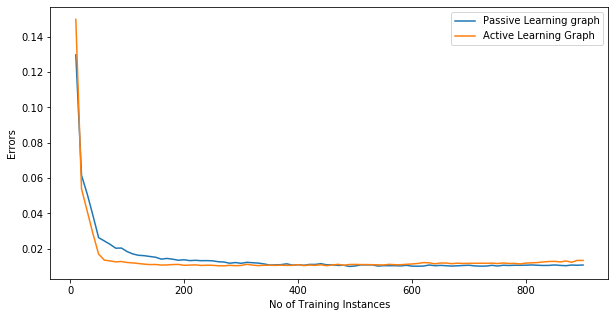

In [146]:
plt.rcParams["figure.figsize"]=[10,5]
plt.plot(gr_df['Number_of_Training_Ins'],gr_df['Passive_Test_Errors'])
plt.plot(gr_df['Number_of_Training_Ins'],gr_df['Active_Test_Errors'])
plt.legend(['Passive Learning graph','Active Learning Graph'],loc='upper right')
plt.xlabel('No of Training Instances')
plt.ylabel('Errors')
         
   

From the graph, we can say that active learning performs better(lesser testing error) than passive learning on an average.(approximately till 500 training instances). However, as the sample size increases,their performances eventually become similar.